# PROJECT 2

# Τσολάκος Θεόδωρος 1115201600183
# Βιρβιδάκη Χρυσούλα 1115201600021

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import numpy as np

# Δημιουργία αρχείων train_set και test_set

In [106]:
df = pd.DataFrame(columns=["id" , "title" , "content" , "category"])

i=1
prev_dir = r"C:\Users\chrysa\Documents\TEDedomenwn\ask2\fulltext\data"
categories = ["business", "entertainment", "politics", "sport", "tech"]
for category in categories:
    dir = prev_dir + "\\" + category
    for r, d, f in os.walk(dir):
        for file in f:
            file_path = dir + "\\" + file

            counter=0
            contents = ""
            with open(file_path, mode="r", encoding="utf8",errors='ignore') as my_file:
                if (category == "sport") & (i==199):
                    continue
                for line in my_file:
                    line = line.replace('\n','')
                    if counter==0:
                        df.loc[i,["title"]] = line
                    else:
                        contents = contents + " " + line
                    counter = counter+1;
                df.loc[i,["content"]] = contents

            df.loc[i,["id"]] = i
            df.loc[i,["category"]] = category
            i +=1
    
df
array =df.to_numpy()


X_train, X_test,y_train, y_test  = train_test_split(array[:, :3],array[ : , 3], test_size=0.2,random_state=100,stratify=array[:,3])
pd.DataFrame(X_test).to_csv('test_set.tsv',index=False,sep='\t',header=None)
pd.DataFrame(np.column_stack([X_train, y_train])).to_csv('train_set.tsv',index=False,sep='\t',header=None)
#X_train.shape = (1780,3) periexei thn gnwsti plhroforia gia to 80% twn arxeiwn
#X_test.shape = (445,3)   periexei gia to 80% twn arxeiwn tis kathgories stis opoies anhkoyn
#y_train.shape = (1780,)  periexei tis plhrofories gia to 20% tvn arxeiwn ta opoia tha symmetexoyn sto test
#y_test.shape = (445,)    periexei tis swstes kathgories stis opoies anhkoyn ta arxeia poy tha symmetexoyn sto test

#to arxeio train_set.tsv exei gia to 80% kai olh thn plhroforia kai thn kathgoria sthn opoia anhkoyn
#to arxeio test_set.tsv exei mono tis plhrofories gia to 20% kai oxi thn kathgoria sthn opoia anhkoyn

In [107]:
# Βοηθητικές μεταβλητές που χρειαζόμαστε στην συνέχεια.
temp_X_train = X_train
temp_y_train = y_train

# 1. Δημιουργία WordCloud

In [108]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [109]:
#Για τη δημιουργία των wordclouds αρχικά δημιουργούμε μία ομάδα από stop words που δεν προσφέρουν χρήσιμη πληροφορία 
#και έπειτα δημιουργούμε τα 5 διαφορετικά wordclouds βασισμένα στα contents του κάθε είδους.

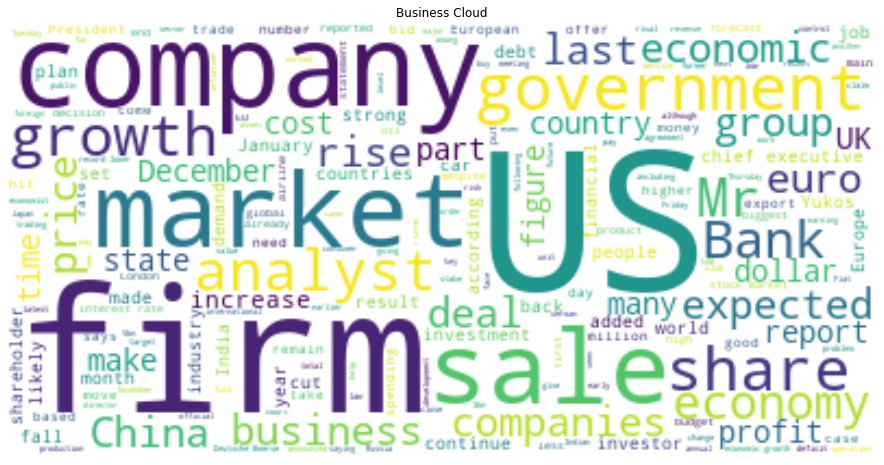

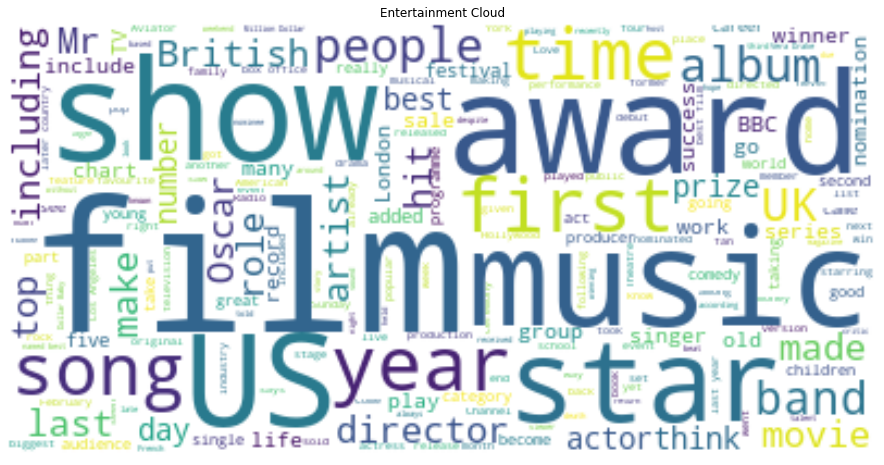

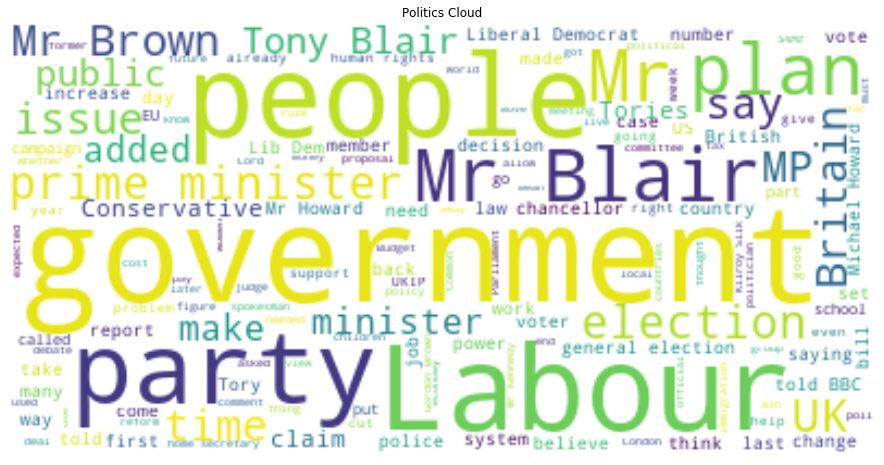

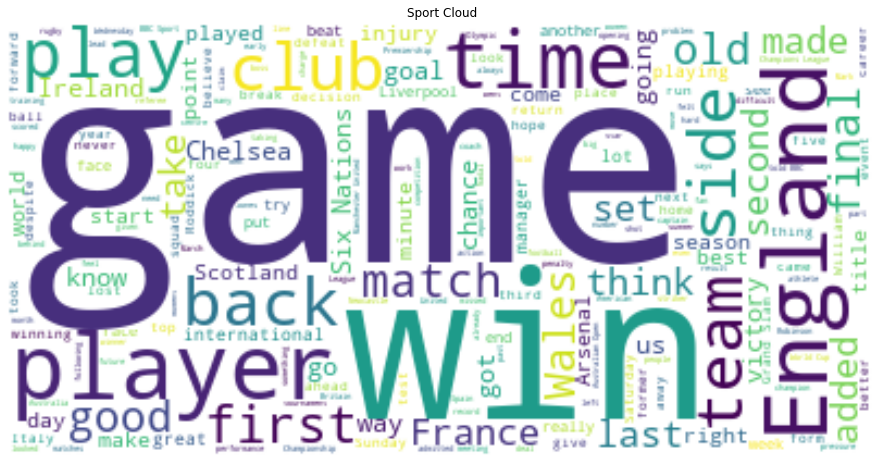

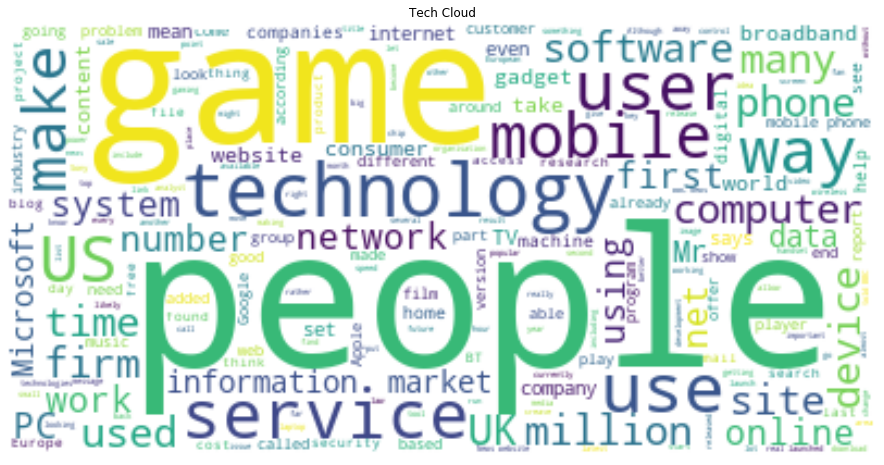

In [110]:
#Create the stop words
business_text = "" 
for i in range(X_train.shape[0]):
    if(y_train[i] == "business"):
        business_text += X_train[i][2]
        
ntlk_sw = set(stopwords.words('english'))
total_sw = list(ntlk_sw) + list(STOPWORDS)
total_sw.append('said')
total_sw.append('may')
total_sw.append('much')
total_sw.append('year')
total_sw.append('one')
total_sw.append('two')
total_sw.append('three')
total_sw.append('new')
total_sw.append('want')
total_sw.append('still')
total_sw.append('well')
total_sw.append('say')


# BUSINESS CLOUD
business_cloud = WordCloud(background_color = 'white', max_words = 200, stopwords = total_sw).generate(business_text)

plt.figure(figsize=[18,8])
plt.imshow(business_cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Business Cloud")
plt.show()

# ENTERTAINMENT CLOUD
entertainment_text = "" 
for i in range(X_train.shape[0]):
    if(y_train[i] == "entertainment"):
        entertainment_text += X_train[i][2]

entertainment_cloud = WordCloud(background_color = 'white', max_words = 200, stopwords = total_sw).generate(entertainment_text)

plt.figure(figsize=[18,8])
plt.imshow(entertainment_cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Entertainment Cloud")
plt.show()

# POLITICS CLOUD
politics_text = "" 
for i in range(X_train.shape[0]):
    if(y_train[i] == "politics"):
        politics_text += X_train[i][2]

politics_cloud = WordCloud(background_color = 'white', max_words = 200, stopwords = total_sw).generate(politics_text)

plt.figure(figsize=[18,8])
plt.imshow(politics_cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Politics Cloud")
plt.show()

# SPORT CLOUD
sport_text = "" 
for i in range(X_train.shape[0]):
    if(y_train[i] == "sport"):
        sport_text += X_train[i][2]

sport_cloud = WordCloud(background_color = 'white', max_words = 200, stopwords = total_sw).generate(sport_text)

plt.figure(figsize=[18,8])
plt.imshow(sport_cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Sport Cloud")
plt.show()

# TECH CLOUD
tech_text = "" 
for i in range(X_train.shape[0]):
    if(y_train[i] == "tech"):
        tech_text += X_train[i][2]

tech_cloud = WordCloud(background_color = 'white', max_words = 200, stopwords = total_sw).generate(tech_text)

plt.figure(figsize=[18,8])
plt.imshow(tech_cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Tech Cloud")
plt.show()

# 2. Υλοποίηση Κατηγοριοποίησης (Classification)

In [111]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import metrics

In [112]:
# Δημιουργία της BoW αναπαράστασης των κειμένων τόσο σε απλά counts, όσο και ξεχωριστά στον tf-idf μετασχηματισμό των counts.

In [113]:
# Παίρνουμε αρχικά τις στήλες που μας ενδιαφέρουν ('content', 'category') από το 80% και το 20% αντίστοιχα των αρχείων
X_train_text = np.column_stack([X_train, y_train])[: ,2]
y_train_text = np.column_stack([X_train, y_train])[: ,3]

X_test_text = X_test[:, 2]
y_test_text = y_test

le = preprocessing.LabelEncoder()

# Σε απλά counts
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train_text)
y_train = le.fit_transform(y_train_text)

X_test_counts = count_vect.transform(X_test_text)
y_test_counts = le.transform(y_test_text)


# Στον tf-idf μετασχηματισμό των counts
tfidf_vect = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000,stop_words='english',ngram_range = (1,2))
tfidf_X_train = tfidf_vect.fit_transform(X_train_text)
tfidf_y_train = le.fit_transform(y_train_text)

tfidf_X_test_counts = tfidf_vect.transform(X_test_text)
tfidf_y_test_counts = le.transform(y_test_text)


#                                                   CLASSIFICATION: SVM

In [114]:
# Υλοποιούμε την κατηγοριοποίηση και στις δύο αναπαραστάσεις των κειμένων
# Από την αναπαράσταση των κειμένων σε απλά counts προκύπτει ο simple_clf
# Και από την αναπαράσταση των κειμένων στον tf-idf μετασχηματισμό των counts προκύπτει ο tfidf_clf

# Πειραματιστήκαμε με τις παραμέτρους kernel , c , gamma και καταλήξαμε σε αυτό τον συνδυασμό
# ο οποίος δίνει και τα καλύτερα αποτελέσματα

In [115]:
clf = svm.SVC(kernel='linear', C=0.7,gamma='auto')
simple_clf = clf.fit(X_train, y_train)

clf = svm.SVC(kernel='linear', C=0.7,gamma='auto')
tfidf_clf = clf.fit(tfidf_X_train, tfidf_y_train)


# Precision / Recall / F-Measure  για τα Simple counts 

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [117]:
# Αρχικά υπολογίζουμε τα scores με τις μετρικές αυτές για τα train δεδομένα χρησιμοποιώντας 10-fold Cross Validation

In [118]:
scoring = ['precision_macro', 'recall_macro']
scores = cross_val_score(simple_clf, X_train, y_train, cv=10)
print("Train Scores", np.mean(scores))

precisions = cross_val_score(simple_clf, X_train, y_train, cv=10,scoring='precision_macro')
print("Train precisions", np.mean(precisions))

recalls = cross_val_score(simple_clf, X_train, y_train, cv=10,scoring='recall_macro')
print("Train recalls", np.mean(recalls))

f1s = cross_val_score(simple_clf, X_train, y_train, cv=10, scoring='f1_macro')
print ('Train f1s', np.mean(f1s))



Train Scores 0.9522471910112358
Train precisions 0.953717048545539
Train recalls 0.9498252516370256
Train f1s 0.9508302109973232


In [119]:
# Έπειτα υπολογίζουμε τα αντίστοιχα scores με τις ίδες μετρικές για τα test δεδομένα
# και αξιολογούμε την απόδοση της μεθόδου κατηγοριοποίησης

In [120]:
y_pred = cross_val_predict(simple_clf, X_test_counts, y_test_counts,cv=10)

Precision_score = precision_score(y_test_counts, y_pred, average='weighted')
print('Test precision score: ' , Precision_score)

Recall_score = recall_score(y_test_counts, y_pred, average='weighted')
print('Test recall score: ' , Recall_score)

F1_score = f1_score(y_test_counts, y_pred, average='weighted')
print('Test f1 score: ' , F1_score)


Test precision score:  0.9270027007105659
Test recall score:  0.9258426966292135
Test f1 score:  0.9255912175669396


#  10-fold Cross Validation ,  Precision / Recall / F-Measure  για tf-idf μετασχηματισμό των counts

In [121]:
# Αρχικά υπολογίζουμε τα scores με τις μετρικές αυτές για τα train δεδομένα χρησιμοποιώντας 10-fold Cross Validation

In [122]:
scoring = ['precision_macro', 'recall_macro']
tfidf_scores = cross_val_score(tfidf_clf, tfidf_X_train, tfidf_y_train, cv=10)
print("Tfidf_Train Scores", np.mean(tfidf_scores))

tfidf_precisions = cross_val_score(tfidf_clf, tfidf_X_train, tfidf_y_train, cv=10,scoring='precision_macro')
print("Tfidf_Train precisions", np.mean(tfidf_precisions))

tfidf_recalls = cross_val_score(tfidf_clf, tfidf_X_train, tfidf_y_train, cv=10,scoring='recall_macro')
print("Tfidf_Train recalls", np.mean(tfidf_recalls))

tfidf_f1s = cross_val_score(tfidf_clf, tfidf_X_train, tfidf_y_train, cv=10, scoring='f1_macro')
print ('Tfidf_Train f1s', np.mean(tfidf_f1s))

Tfidf_Train Scores 0.9657303370786516
Tfidf_Train precisions 0.9667673879338166
Tfidf_Train recalls 0.9653094463985437
Tfidf_Train f1s 0.9654283736489809


In [123]:
# Έπειτα υπολογίζουμε τα αντίστοιχα scores με τις ίδες μετρικές για τα test δεδομένα
# και αξιολογούμε την απόδοση της μεθόδου κατηγοριοποίησης

In [124]:
tfidf_y_pred = cross_val_predict(tfidf_clf, tfidf_X_test_counts, tfidf_y_test_counts,cv=10)
#tfidf_y_pred = tfidf_clf.predict(tfidf_X_test_counts)

tfidf_precision_score = precision_score(tfidf_y_test_counts, tfidf_y_pred, average='weighted')
print('Tfidf_Test precision score: ' , tfidf_precision_score)

tfidf_recall_score = recall_score(tfidf_y_test_counts, tfidf_y_pred, average='weighted')
print('Tfidf_Test recall score: ' , tfidf_recall_score)

tfidf_f1_score = f1_score(tfidf_y_test_counts, tfidf_y_pred, average='weighted')
print('Tfidf_Test f1 score: ' , tfidf_f1_score)

Tfidf_Test precision score:  0.957661904463392
Tfidf_Test recall score:  0.9573033707865168
Tfidf_Test f1 score:  0.9572005832274298


#  Accuracy για Simple counts και tf-idf μετασχηματισμό των counts

In [125]:
from sklearn.metrics import accuracy_score

In [126]:
# Αρχικά υπολογίζουμε τα scores για τα train δεδομένα χρησιμοποιώντας 10-fold Cross Validation

In [127]:
accuracy = cross_val_score(simple_clf, X_train, y_train, cv=10,scoring='accuracy')
print("Train accuracy", np.mean(accuracy))

tfidf_accuracy = cross_val_score(tfidf_clf, tfidf_X_train, tfidf_y_train, cv=10,scoring='accuracy')
print("Tfidf_Train accuracy", np.mean(tfidf_accuracy))

Train accuracy 0.9522471910112358
Tfidf_Train accuracy 0.9657303370786516


In [128]:
# Έπειτα υπολογίζουμε τα αντίστοιχα scores για τα test δεδομένα
# και αξιολογούμε την απόδοση της μεθόδου κατηγοριοποίησης

In [129]:
Accuracy = accuracy_score(y_test_counts, y_pred)
print("Test Accuracy score: ", Accuracy)

tfidf_Accuracy = accuracy_score(tfidf_y_test_counts, tfidf_y_pred)
print("Tfidf_Test Accuracy score" ,tfidf_Accuracy)


Test Accuracy score:  0.9258426966292135
Tfidf_Test Accuracy score 0.9573033707865168


#   ROC plot για Simple counts

In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from itertools import cycle

In [131]:
# Υλοποιούμε μια συνάρτηση με την οποία σχεδιάζουμε το διάγραμμα που δείχνει την απόδοση για κάθε μία από τις 
# (πέντε στην περίπτωσή μας) διαφορετικές κλάσεις. Αυτήν την συνάρτηση θα καλούμε για να αξιολογήσουμε όλες
# τις μεθόδους κατηγοριοποίησης στη συνέχεια.

In [132]:
def RocPlot():
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes
    lw=2
 
    # Plot all ROC curves

    fig=plt.figure(figsize=(15,10), dpi=100)
    ax = fig.add_subplot(1, 1, 1)
    major_ticks = np.arange(0.0, 1.0, 0.05)
    minor_ticks = np.arange(0.0, 1.0, 0.05)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which='both')

    colors = cycle(['green', 'orange', 'blue', 'pink', 'red'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))


    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC plot for all the classes')
    plt.legend(loc="lower right")
    plt.show()

In [133]:
# Yπολογίζουμε τα scores για τα test δεδομένα της κάθε κλάσης
# και αξιολογούμε την απόδοση της μεθόδου κατηγοριοποίησης μέσω του διαγράμματος 

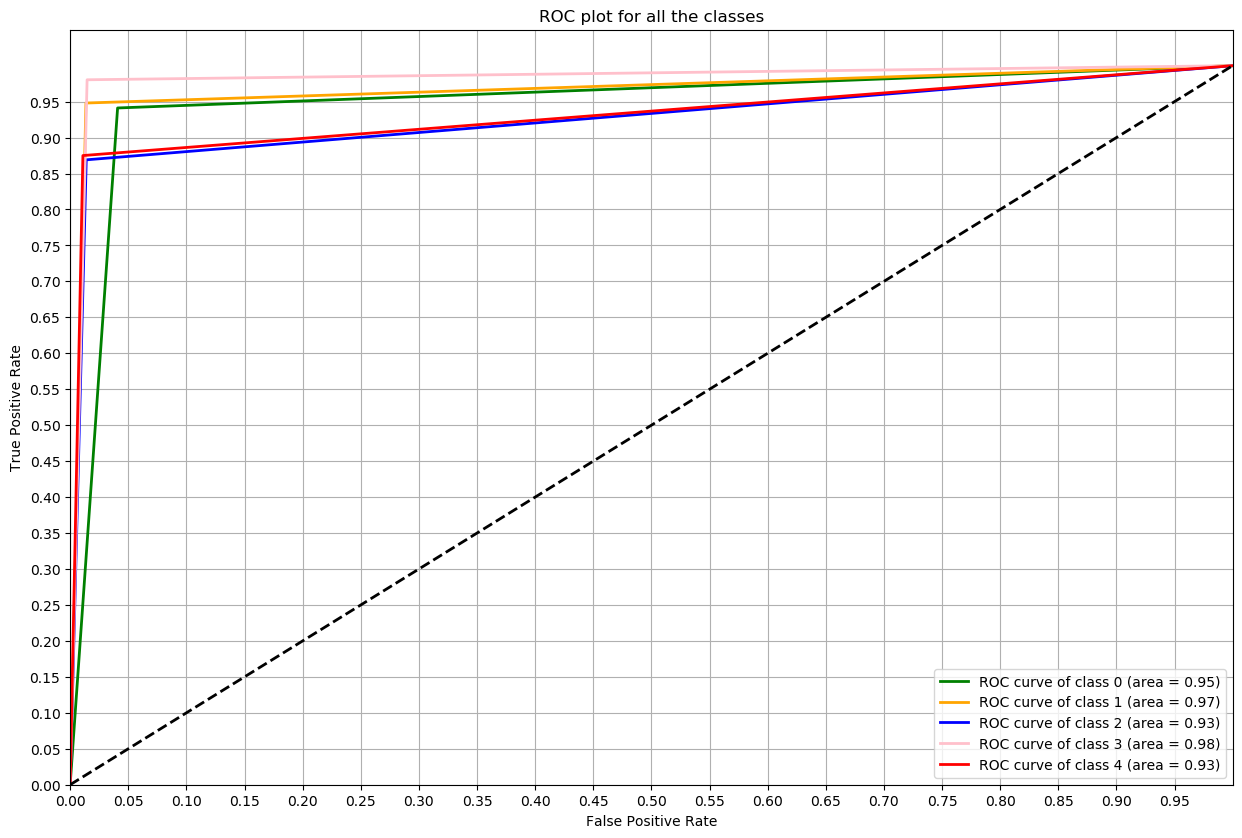

In [134]:
y_test_counts_bi = label_binarize(y_test_counts, classes=[0, 1, 2,3,4])
y_pred_bi = label_binarize(y_pred,classes=[0,1,2,3,4])
n_classes = y_test_counts_bi.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_counts_bi[:, i], y_pred_bi[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

RocPlot()

#  ROC plot για  tf-idf μετασχηματισμό των counts

In [135]:
# Ακολοθούμε την ίδια διαδικασία με προηγουμένως αυτή τη φορά για την αναπαράσταση κειμένων με tf-idf μετασχηματισμό των counts
# και καλούμε και πάλι την συνάρτηση μας για να δημιουργηθεί το διάγραμμα

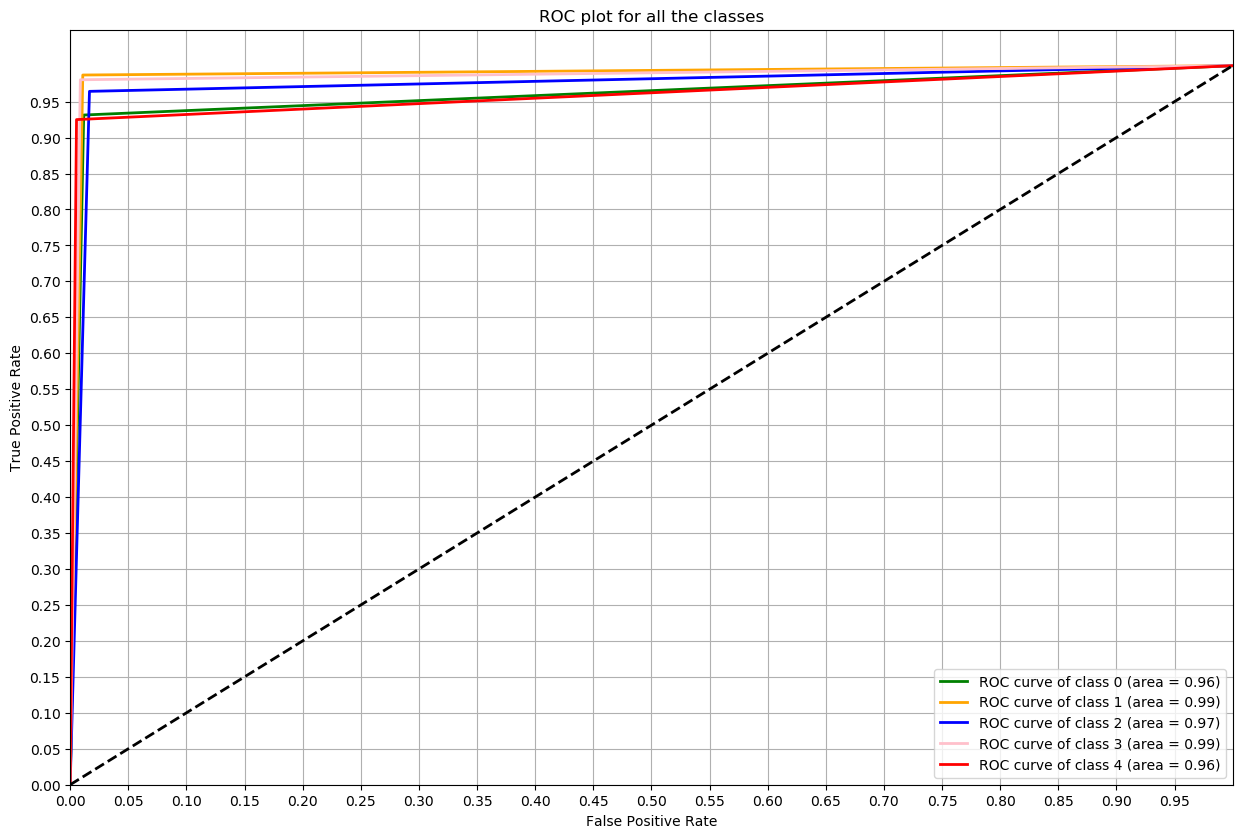

In [136]:
tfidf_y_test_counts_bi = label_binarize(tfidf_y_test_counts, classes=[0, 1, 2,3,4])
tfidf_y_pred_bi = label_binarize(tfidf_y_pred,classes=[0,1,2,3,4])
n_classes = tfidf_y_test_counts_bi.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(tfidf_y_test_counts_bi[:, i], tfidf_y_pred_bi[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

RocPlot()

In [137]:
# Παρουσιάζουμε μια σύνοψη των αποτελεσμάτων

In [138]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [139]:
print(classification_report(y_test_counts, y_pred))
print(confusion_matrix(y_test_counts, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       102
           1       0.94      0.95      0.94        77
           2       0.94      0.87      0.90        84
           3       0.95      0.98      0.97       102
           4       0.95      0.88      0.91        80

    accuracy                           0.93       445
   macro avg       0.93      0.92      0.92       445
weighted avg       0.93      0.93      0.93       445

[[ 96   2   3   0   1]
 [  1  73   1   2   0]
 [  6   1  73   3   1]
 [  0   0   0 100   2]
 [  7   2   1   0  70]]


#                                              CLASSIFICATION: RANDOM FORESTS

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [141]:
# Υλοποιούμε και πάλι την κατηγοριοποίηση και στις δύο αναπαραστάσεις των κειμένων
# Από την αναπαράσταση των κειμένων σε απλά counts προκύπτει ο simple_clf
# Και από την αναπαράσταση των κειμένων στον tf-idf μετασχηματισμό των counts προκύπτει ο tfidf_clf

In [142]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
simple_clf = clf.fit(X_train, y_train)

clf = RandomForestClassifier(max_depth=2, random_state=0)
tfidf_clf = clf.fit(tfidf_X_train, tfidf_y_train)

#  Precision / Recall / F-Measure  για Simple counts

In [143]:
# Αρχικά υπολογίζουμε τα scores με τις μετρικές αυτές για τα train δεδομένα χρησιμοποιώντας 10-fold Cross Validation

In [144]:
scores = cross_val_score(simple_clf, X_train, y_train, cv=10)
print("Train Scores", np.mean(scores))

precisions = cross_val_score(simple_clf, X_train, y_train, cv=10,scoring='precision_macro')
print("Train precisions", np.mean(precisions))

recalls = cross_val_score(simple_clf, X_train, y_train, cv=10,scoring='recall_macro')
print("Train recalls", np.mean(recalls))

f1s = cross_val_score(simple_clf, X_train, y_train, cv=10, scoring='f1_macro')
print ('Train f1s', np.mean(f1s))

Train Scores 0.80561797752809
Train precisions 0.8755604710098842
Train recalls 0.7838278335724534
Train f1s 0.7907752247011485


In [145]:
# Έπειτα υπολογίζουμε τα αντίστοιχα scores με τις ίδες μετρικές για τα test δεδομένα
# και αξιολογούμε την απόδοση της μεθόδου κατηγοριοποίησης

In [146]:
y_pred = cross_val_predict(simple_clf, X_test_counts, y_test_counts,cv=10)

Precision_score = precision_score(y_test_counts, y_pred, average='weighted')
print('Test precision score: ' , Precision_score)

Recall_score = recall_score(y_test_counts, y_pred, average='weighted')
print('Test recall score: ' , Recall_score)

F1_score = f1_score(y_test_counts, y_pred, average='weighted')
print('Test f1 score: ' , F1_score)

Test precision score:  0.8269490292793159
Test recall score:  0.7258426966292135
Test f1 score:  0.6992500377265921


#  Precision / Recall / F-Measure  για tf-idf μετασχηματισμό των counts

In [147]:
# Αρχικά υπολογίζουμε τα scores με τις μετρικές αυτές για τα train δεδομένα χρησιμοποιώντας 10-fold Cross Validation

In [148]:
tfidf_scores = cross_val_score(tfidf_clf, tfidf_X_train, tfidf_y_train, cv=10)
print("Tfidf_Train Scores", np.mean(tfidf_scores))

tfidf_precisions = cross_val_score(tfidf_clf, tfidf_X_train, tfidf_y_train, cv=10,scoring='precision_macro')
print("Tfidf_Train precisions", np.mean(tfidf_precisions))

tfidf_recalls = cross_val_score(tfidf_clf, tfidf_X_train, tfidf_y_train, cv=10,scoring='recall_macro')
print("Tfidf_Train recalls", np.mean(tfidf_recalls))

tfidf_f1s = cross_val_score(tfidf_clf, tfidf_X_train, tfidf_y_train, cv=10, scoring='f1_macro')
print ('Tfidf_Train f1s', np.mean(tfidf_f1s))

Tfidf_Train Scores 0.8067415730337079
Tfidf_Train precisions 0.8616119629581644
Tfidf_Train recalls 0.7873363091857156
Tfidf_Train f1s 0.7956061545701207


In [149]:
# Έπειτα υπολογίζουμε τα αντίστοιχα scores με τις ίδες μετρικές για τα test δεδομένα
# και αξιολογούμε την απόδοση της μεθόδου κατηγοριοποίησης

In [150]:
tfidf_y_pred = cross_val_predict(tfidf_clf, tfidf_X_test_counts, tfidf_y_test_counts,cv=10)

tfidf_precision_score = precision_score(tfidf_y_test_counts, tfidf_y_pred, average='weighted')
print('Tfidf_Test precision score: ' , tfidf_precision_score)

tfidf_recall_score = recall_score(tfidf_y_test_counts, tfidf_y_pred, average='weighted')
print('Tfidf_Test recall score: ' , tfidf_recall_score)

tfidf_f1_score = f1_score(tfidf_y_test_counts, tfidf_y_pred, average='weighted')
print('Tfidf_Test f1 score: ' , tfidf_f1_score)

Tfidf_Test precision score:  0.8236304006174859
Tfidf_Test recall score:  0.7685393258426966
Tfidf_Test f1 score:  0.7603598488195816


#  Accuracy για Simple counts και tf-idf μετασχηματισμό των counts

In [151]:
# Αρχικά υπολογίζουμε τα scores για τα train δεδομένα χρησιμοποιώντας 10-fold Cross Validation

In [152]:
accuracy = cross_val_score(simple_clf, X_train, y_train, cv=10,scoring='accuracy')
print("Train accuracy", np.mean(accuracy))

tfidf_accuracy = cross_val_score(tfidf_clf, tfidf_X_train, tfidf_y_train, cv=10,scoring='accuracy')
print("Tfidf_Train accuracy", np.mean(tfidf_accuracy))

Train accuracy 0.80561797752809
Tfidf_Train accuracy 0.8067415730337079


In [153]:
# Έπειτα υπολογίζουμε τα αντίστοιχα scores για τα test δεδομένα
# και αξιολογούμε την απόδοση της μεθόδου κατηγοριοποίησης

In [154]:
Accuracy = accuracy_score(y_test_counts, y_pred)
print("Test Accuracy: ", Accuracy)

tfidf_Accuracy = accuracy_score(tfidf_y_test_counts, tfidf_y_pred)
print("tfidf_Test Accuracy " ,tfidf_Accuracy)

Test Accuracy:  0.7258426966292135
tfidf_Test Accuracy  0.7685393258426966


#   ROC plot για Simple counts

In [155]:
# Yπολογίζουμε τα scores για τα test δεδομένα της κάθε κλάσης
# και αξιολογούμε την απόδοση της μεθόδου κατηγοριοποίησης μέσω του διαγράμματος 

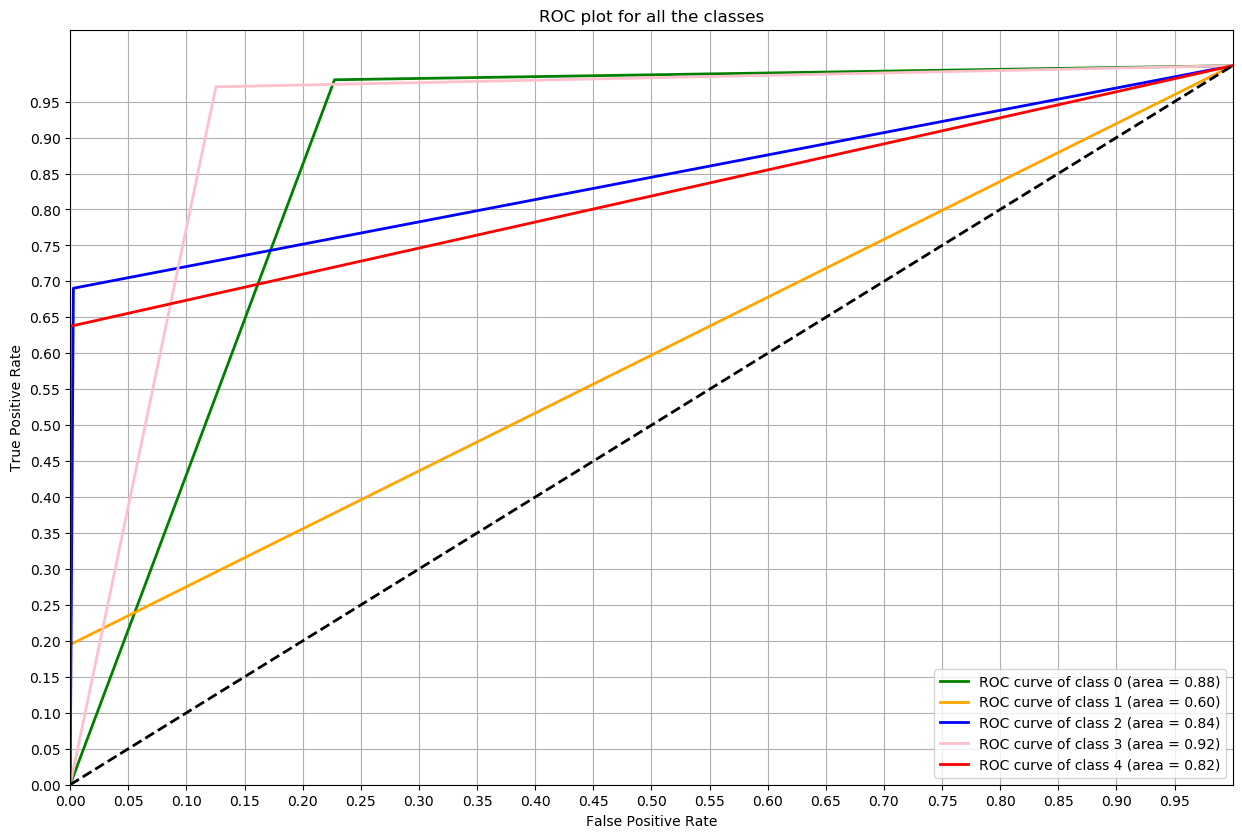

In [156]:
y_test_counts_bi = label_binarize(y_test_counts, classes=[0, 1, 2,3,4])
y_pred_bi = label_binarize(y_pred,classes=[0,1,2,3,4])
n_classes = y_test_counts_bi.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_counts_bi[:, i], y_pred_bi[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

RocPlot()

#  ROC plot για tf-idf μετασχηματισμό των counts

In [157]:
# Ακολοθούμε την ίδια διαδικασία με προηγουμένως αυτή τη φορά για την αναπαράσταση κειμένων με tf-idf μετασχηματισμό των counts
# και καλούμε και πάλι την συνάρτηση μας για να δημιουργηθεί το διάγραμμα

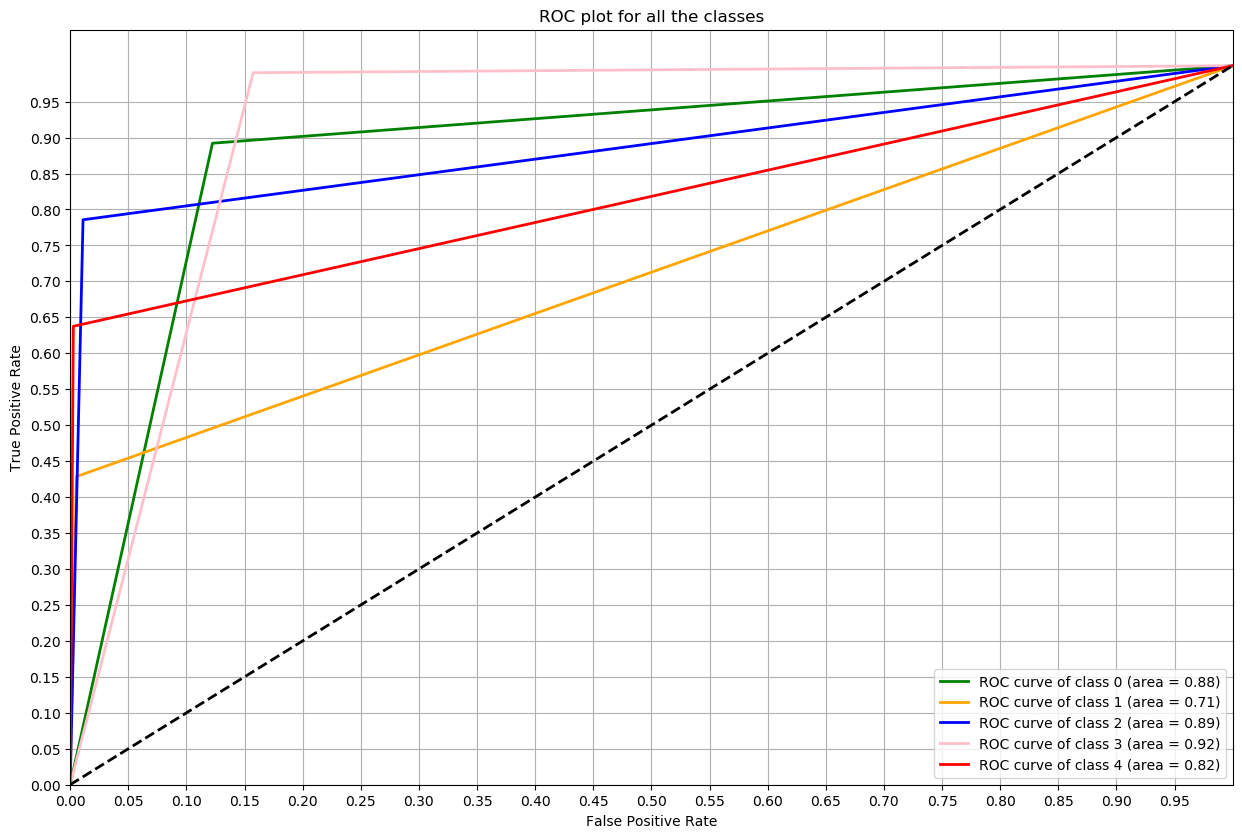

In [158]:
tfidf_y_test_counts_bi = label_binarize(tfidf_y_test_counts, classes=[0, 1, 2,3,4])
tfidf_y_pred_bi = label_binarize(tfidf_y_pred,classes=[0,1,2,3,4])
n_classes = tfidf_y_test_counts_bi.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(tfidf_y_test_counts_bi[:, i], tfidf_y_pred_bi[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
RocPlot()

In [159]:
# Παρουσιάζουμε μια σύνοψη των αποτελεσμάτων

In [160]:
print(classification_report(y_test_counts, y_pred))
print(confusion_matrix(y_test_counts, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.98      0.71       102
           1       1.00      0.19      0.33        77
           2       0.98      0.69      0.81        84
           3       0.70      0.97      0.81       102
           4       1.00      0.64      0.78        80

    accuracy                           0.73       445
   macro avg       0.85      0.69      0.69       445
weighted avg       0.83      0.73      0.70       445

[[100   0   1   1   0]
 [ 34  15   0  28   0]
 [ 19   0  58   7   0]
 [  3   0   0  99   0]
 [ 22   0   0   7  51]]


#                                            CLASSIFICATION:  NAIVE BAYES 

In [161]:
from sklearn.naive_bayes import GaussianNB

In [162]:
# Υλοποιούμε και πάλι την κατηγοριοποίηση και στις δύο αναπαραστάσεις των κειμένων
# Από την αναπαράσταση των κειμένων σε απλά counts προκύπτει ο simple_gnb
# Και από την αναπαράσταση των κειμένων στον tf-idf μετασχηματισμό των counts προκύπτει ο tfidf_gnb

In [163]:
gnb = GaussianNB()
simple_gnb = gnb.fit(X_train.todense(), y_train)

gnb = GaussianNB()
tfidf_gnb = gnb.fit(tfidf_X_train.todense(), tfidf_y_train)


#  Precision / Recall / F-Measure για Simple counts

In [164]:
# Αρχικά υπολογίζουμε τα scores με τις μετρικές αυτές για τα train δεδομένα χρησιμοποιώντας 10-fold Cross Validation

In [165]:
scores = cross_val_score(simple_gnb, X_train.todense(), y_train, cv=10)
print("Train Scores", np.mean(scores))

precisions = cross_val_score(simple_gnb, X_train.todense(), y_train, cv=10,scoring='precision_macro')
print("Train precisions", np.mean(precisions))

recalls = cross_val_score(simple_gnb, X_train.todense(), y_train, cv=10,scoring='recall_macro')
print("Train recalls", np.mean(recalls))

f1s = cross_val_score(simple_gnb, X_train.todense(), y_train, cv=10, scoring='f1_macro')
print ('Train f1s', np.mean(f1s))

Train Scores 0.9275280898876405
Train precisions 0.9278642924235483
Train recalls 0.9275898986159088
Train f1s 0.926326278370405


In [166]:
# Έπειτα υπολογίζουμε τα αντίστοιχα scores με τις ίδες μετρικές για τα test δεδομένα
# και αξιολογούμε την απόδοση της μεθόδου κατηγοριοποίησης

In [167]:
y_pred = cross_val_predict(simple_gnb, X_test_counts.todense(), y_test_counts,cv=10)

Precision_score = precision_score(y_test_counts, y_pred, average='weighted')
print('Test precision score: ' , Precision_score)

Recall_score = recall_score(y_test_counts, y_pred, average='weighted')
print('Test recall score: ' , Recall_score)

F1_score = f1_score(y_test_counts, y_pred, average='weighted')
print('Test f1 score: ' , F1_score)

Test precision score:  0.9119698170622419
Test recall score:  0.9078651685393259
Test f1 score:  0.908020563252407


#  Precision / Recall / F-Measure για tf-idf μετασχηματισμό των counts

In [168]:
# Αρχικά υπολογίζουμε τα scores με τις μετρικές αυτές για τα train δεδομένα χρησιμοποιώντας 10-fold Cross Validation

In [169]:
tfidf_scores = cross_val_score(tfidf_gnb, tfidf_X_train.todense(), tfidf_y_train, cv=10)
print("Tfidf_Train Scores", np.mean(tfidf_scores))

tfidf_precisions = cross_val_score(tfidf_gnb, tfidf_X_train.todense(), tfidf_y_train, cv=10,scoring='precision_macro')
print("Tfidf_Train precisions", np.mean(tfidf_precisions))

tfidf_recalls = cross_val_score(tfidf_gnb, tfidf_X_train.todense(), tfidf_y_train, cv=10,scoring='recall_macro')
print("Tfidf_Train recalls", np.mean(tfidf_recalls))

tfidf_f1s = cross_val_score(tfidf_gnb, tfidf_X_train.todense(), tfidf_y_train, cv=10, scoring='f1_macro')
print ('Tfidf_Train f1s', np.mean(tfidf_f1s))

Tfidf_Train Scores 0.8921348314606743
Tfidf_Train precisions 0.8954664609953564
Tfidf_Train recalls 0.8914150983617823
Tfidf_Train f1s 0.8904589295433369


In [170]:
# Έπειτα υπολογίζουμε τα αντίστοιχα scores με τις ίδες μετρικές για τα test δεδομένα
# και αξιολογούμε την απόδοση της μεθόδου κατηγοριοποίησης

In [171]:
tfidf_y_pred = cross_val_predict(tfidf_gnb, tfidf_X_test_counts.todense(), tfidf_y_test_counts,cv=10)

tfidf_precision_score = precision_score(tfidf_y_test_counts, tfidf_y_pred, average='weighted')
print('Tfidf_Test precision score: ' , tfidf_precision_score)

tfidf_recall_score = recall_score(tfidf_y_test_counts, tfidf_y_pred, average='weighted')
print('Tfidf_Test recall score: ' , tfidf_recall_score)

tfidf_f1_score = f1_score(tfidf_y_test_counts, tfidf_y_pred, average='weighted')
print('Tfidf_Test f1 score: ' , tfidf_f1_score)

Tfidf_Test precision score:  0.885090931824516
Tfidf_Test recall score:  0.8674157303370786
Tfidf_Test f1 score:  0.8681959173253453


#  Accuracy για Simple counts και tf-idf μετασχηματισμό των counts

In [172]:
# Αρχικά υπολογίζουμε τα scores για τα train δεδομένα χρησιμοποιώντας 10-fold Cross Validation

In [173]:
accuracy = cross_val_score(simple_gnb, X_train.todense(), y_train, cv=10,scoring='accuracy')
print("Train accuracy", np.mean(accuracy))

tfidf_accuracy = cross_val_score(tfidf_gnb, tfidf_X_train.todense(), tfidf_y_train, cv=10,scoring='accuracy')
print("Tfidf_Train accuracy", np.mean(tfidf_accuracy))

Train accuracy 0.9275280898876405
Tfidf_Train accuracy 0.8921348314606743


In [174]:
# Έπειτα υπολογίζουμε τα αντίστοιχα scores για τα test δεδομένα
# και αξιολογούμε την απόδοση της μεθόδου κατηγοριοποίησης

In [175]:
Accuracy = accuracy_score(y_test_counts, y_pred)
print("Test Accuracy: ", Accuracy)

tfidf_Accuracy = accuracy_score(tfidf_y_test_counts, tfidf_y_pred)
print("tfidf_Test Accuracy " ,tfidf_Accuracy)

Test Accuracy:  0.9078651685393259
tfidf_Test Accuracy  0.8674157303370786


# ROC plot για Simple counts

In [176]:
# Yπολογίζουμε τα scores για τα test δεδομένα της κάθε κλάσης
# και αξιολογούμε την απόδοση της μεθόδου κατηγοριοποίησης μέσω του διαγράμματος

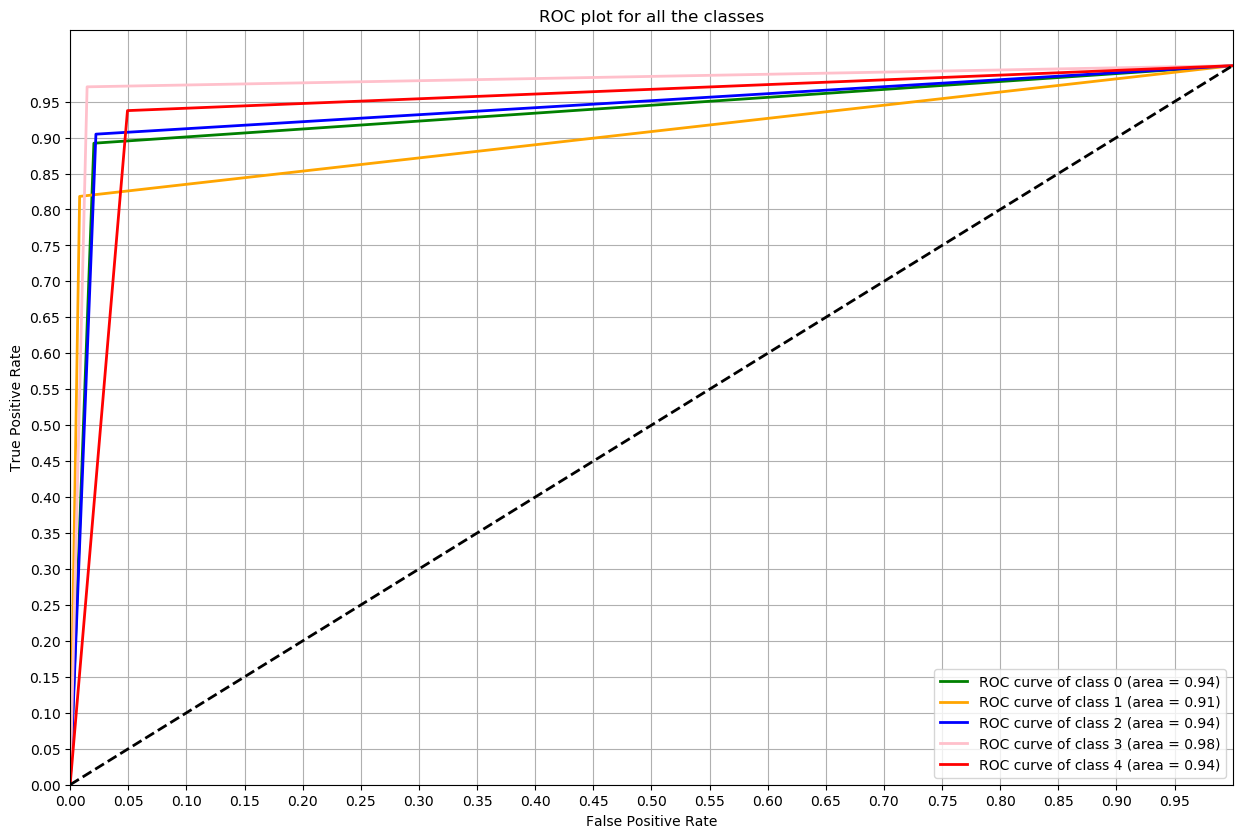

In [177]:
y_test_counts_bi = label_binarize(y_test_counts, classes=[0, 1, 2,3,4])
y_pred_bi = label_binarize(y_pred,classes=[0,1,2,3,4])
n_classes = y_test_counts_bi.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_counts_bi[:, i], y_pred_bi[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

RocPlot()

#  ROC plot για tf-idf μετασχηματισμό των counts

In [178]:
# Ακολοθούμε την ίδια διαδικασία με προηγουμένως αυτή τη φορά για την αναπαράσταση κειμένων με tf-idf μετασχηματισμό των counts
# και καλούμε και πάλι την συνάρτηση μας για να δημιουργηθεί το διάγραμμα

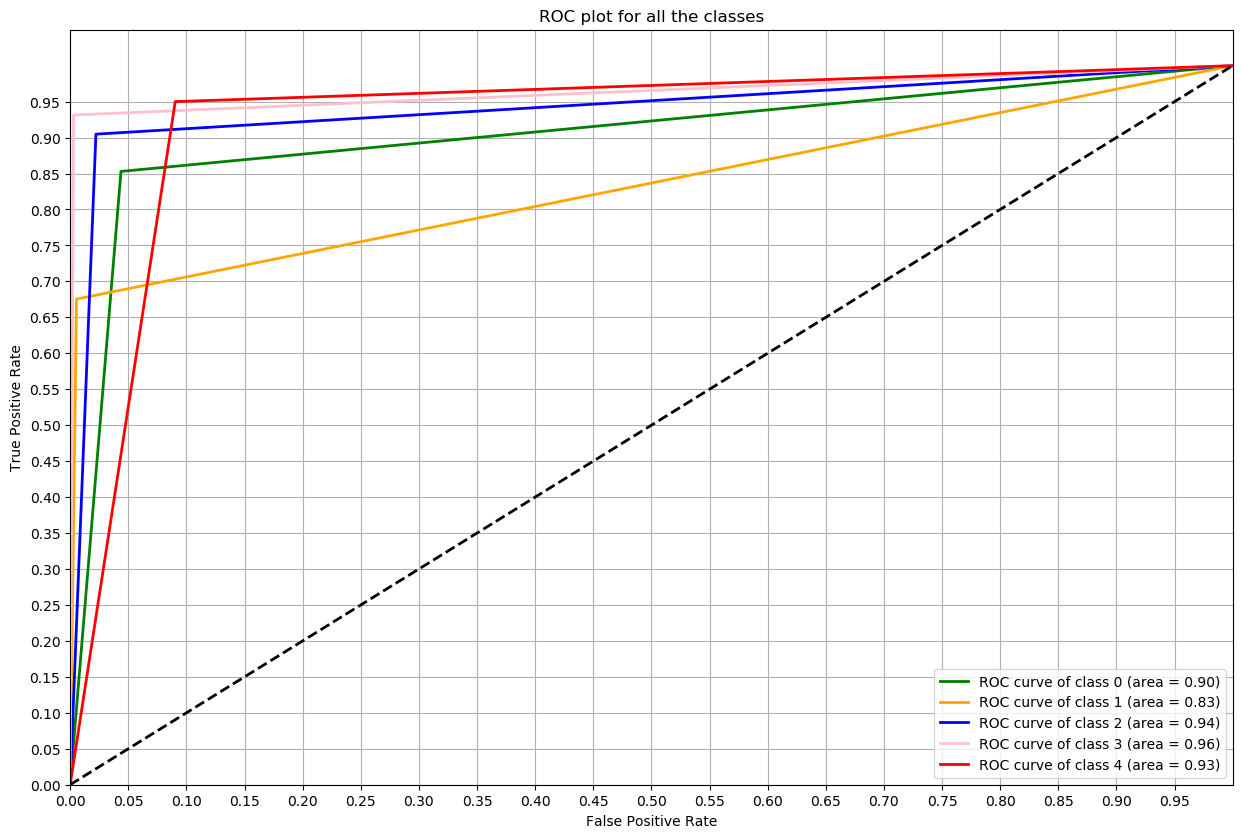

In [179]:
tfidf_y_test_counts_bi = label_binarize(tfidf_y_test_counts, classes=[0, 1, 2,3,4])
tfidf_y_pred_bi = label_binarize(tfidf_y_pred,classes=[0,1,2,3,4])
n_classes = tfidf_y_test_counts_bi.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(tfidf_y_test_counts_bi[:, i], tfidf_y_pred_bi[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

RocPlot()

In [180]:
# Παρουσιάζουμε μια σύνοψη των αποτελεσμάτων

In [181]:
print(classification_report(y_test_counts, y_pred))
print(confusion_matrix(y_test_counts, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       102
           1       0.95      0.82      0.88        77
           2       0.90      0.90      0.90        84
           3       0.95      0.97      0.96       102
           4       0.81      0.94      0.87        80

    accuracy                           0.91       445
   macro avg       0.91      0.90      0.90       445
weighted avg       0.91      0.91      0.91       445

[[91  1  4  2  4]
 [ 0 63  1  2 11]
 [ 5  1 76  0  2]
 [ 0  0  2 99  1]
 [ 2  1  1  1 75]]


#                                             CLASSIFICATION: K-NEAREST NEIGHBOR 

In [182]:
import scipy.spatial
from collections import Counter

In [183]:
# Υλοποιούμε τον αλγόριθμο για την κατηγοριοποίηση με K-Nearest Neighbor 
# Επιλέξαμε την συνάρτηση distance.cosine(x,y) για να υπολογίζουμε τις αποστάσεις
# Και την συνάρτηση predict που βρίσκει σε ποιά κλάση θα κατανεμηθεί το κάθε στοιχείο 
# με βάση το με ποιά κλάση έχει τα περισσότερα κοιν΄΄α σε σύγκριση με τις υπόλοιπες

In [184]:
from sklearn.metrics.pairwise import cosine_similarity
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.classes_, _ = np.unique(y,return_inverse=True)
        return self
        
    def find_distance(self, X1, X2):
        return scipy.spatial.distance.cosine(X1, X2)
    
    def get_params(self, deep=True):
        return {"k": self.k}
    
          
    def predict(self, X_test):
        answer = []
        for i in range(0, X_test.shape[0]):
            similarity = cosine_similarity(X_test[i], self.X_train)
            array = [x for _,x in sorted(zip(similarity[0], self.y_train), reverse=True)]
            labels = array[1: self.k + 1]
            counter = Counter(labels)
            value, count = counter.most_common()[0]
            answer.append(value)
        return answer

In [185]:
# Υλοποιούμε και πάλι την κατηγοριοποίηση και στις δύο αναπαραστάσεις των κειμένων
# Από την αναπαράσταση των κειμένων σε απλά counts προκύπτει ο simple_clf
# Και από την αναπαράσταση των κειμένων στον tf-idf μετασχηματισμό των counts προκύπτει ο tfidf_clf

In [186]:
simple_clf = KNN(8)
simple_clf.fit(X_train, y_train)
y_pred = simple_clf.predict(X_test_counts)

tfidf_clf = KNN(8)
tfidf_clf.fit(tfidf_X_train, tfidf_y_train)
tfidf_y_pred = tfidf_clf.predict(tfidf_X_test_counts)

#  Precision / Recall / F-Measure για Simple counts

In [187]:
# Αρχικά υπολογίζουμε τα scores με τις μετρικές αυτές για τα train δεδομένα χρησιμοποιώντας 10-fold Cross Validation

In [188]:
precisions = cross_val_score(simple_clf, X_train, y_train, cv=10,scoring='precision_macro')
print("Train precisions", np.mean(precisions))

recalls = cross_val_score(simple_clf, X_train, y_train, cv=10,scoring='recall_macro')
print("Train recalls", np.mean(recalls))

f1s = cross_val_score(simple_clf, X_train, y_train, cv=10, scoring='f1_macro')
print ('Train f1s', np.mean(f1s))

Train precisions 0.7733690020756667
Train recalls 0.7424705582892919
Train f1s 0.7347425922871853


In [189]:
# Έπειτα υπολογίζουμε τα αντίστοιχα scores με τις ίδες μετρικές για τα test δεδομένα
# και αξιολογούμε την απόδοση της μεθόδου κατηγοριοποίησης

In [190]:
Precision_score = precision_score(y_test_counts, y_pred, average='weighted')
print('Test precision score: ' , Precision_score)

Recall_score = recall_score(y_test_counts, y_pred, average='weighted')
print('Test recall score: ' , Recall_score)

F1_score = f1_score(y_test_counts, y_pred, average='weighted')
print('Test f1 score: ' , F1_score)

Test precision score:  0.8085689292438711
Test recall score:  0.7662921348314606
Test f1 score:  0.7637755034847636


# Precision / Recall / F-Measure για tf-idf μετασχηματισμό των counts

In [191]:
# Αρχικά υπολογίζουμε τα scores με τις μετρικές αυτές για τα train δεδομένα χρησιμοποιώντας 10-fold Cross Validation

In [192]:
precisions = cross_val_score(tfidf_clf, tfidf_X_train, tfidf_y_train, cv=10,scoring='precision_macro')
print("Tfidf_Train precisions", np.mean(precisions))

recalls = cross_val_score(tfidf_clf, tfidf_X_train, tfidf_y_train, cv=10,scoring='recall_macro')
print("Tfidf_Train recalls", np.mean(recalls))

f1s = cross_val_score(tfidf_clf, tfidf_X_train, tfidf_y_train, cv=10, scoring='f1_macro')
print ('Tfidf_Train f1s', np.mean(f1s))

Tfidf_Train precisions 0.9239291886000336
Tfidf_Train recalls 0.9213100698843117
Tfidf_Train f1s 0.9208500610861756


In [193]:
# Έπειτα υπολογίζουμε τα αντίστοιχα scores με τις ίδες μετρικές για τα test δεδομένα
# και αξιολογούμε την απόδοση της μεθόδου κατηγοριοποίησης

In [194]:
tfidf_precision_score = precision_score(tfidf_y_test_counts, tfidf_y_pred, average='weighted')
print('Tfidf_Test precision score: ' , tfidf_precision_score)

tfidf_recall_score = recall_score(tfidf_y_test_counts, tfidf_y_pred, average='weighted')
print('Tfidf_Test recall score: ' , tfidf_recall_score)

tfidf_f1_score = f1_score(tfidf_y_test_counts, tfidf_y_pred, average='weighted')
print('Tfidf_Test f1 score: ' , tfidf_f1_score)

Tfidf_Test precision score:  0.9262284327735019
Tfidf_Test recall score:  0.9258426966292135
Tfidf_Test f1 score:  0.9257604777346347


#  Accuracy για Simple counts και tf-idf μετασχηματισμό των counts

In [195]:
# Αρχικά υπολογίζουμε τα scores για τα train δεδομένα χρησιμοποιώντας 10-fold Cross Validation

In [196]:
accuracy = cross_val_score(simple_clf, X_train, y_train, cv=10,scoring='accuracy')
print("Train accuracy", np.mean(accuracy))

tfidf_accuracy = cross_val_score(tfidf_clf, tfidf_X_train, tfidf_y_train, cv=10,scoring='accuracy')
print("Tfidf_Train accuracy", np.mean(tfidf_accuracy))

Train accuracy 0.7421348314606742
Tfidf_Train accuracy 0.9241573033707866


In [197]:
# Έπειτα υπολογίζουμε τα αντίστοιχα scores για τα test δεδομένα
# και αξιολογούμε την απόδοση της μεθόδου κατηγοριοποίησης

In [198]:
Accuracy = accuracy_score(y_test_counts, y_pred)
print("Test Accuracy: ", Accuracy)

tfidf_Accuracy = accuracy_score(tfidf_y_test_counts, tfidf_y_pred)
print("tfidf_Test Accuracy " ,tfidf_Accuracy)

Test Accuracy:  0.7662921348314606
tfidf_Test Accuracy  0.9258426966292135


#  ROC plot για Simple counts

In [199]:
# Yπολογίζουμε τα scores για τα test δεδομένα της κάθε κλάσης
# και αξιολογούμε την απόδοση της μεθόδου κατηγοριοποίησης μέσω του διαγράμματος

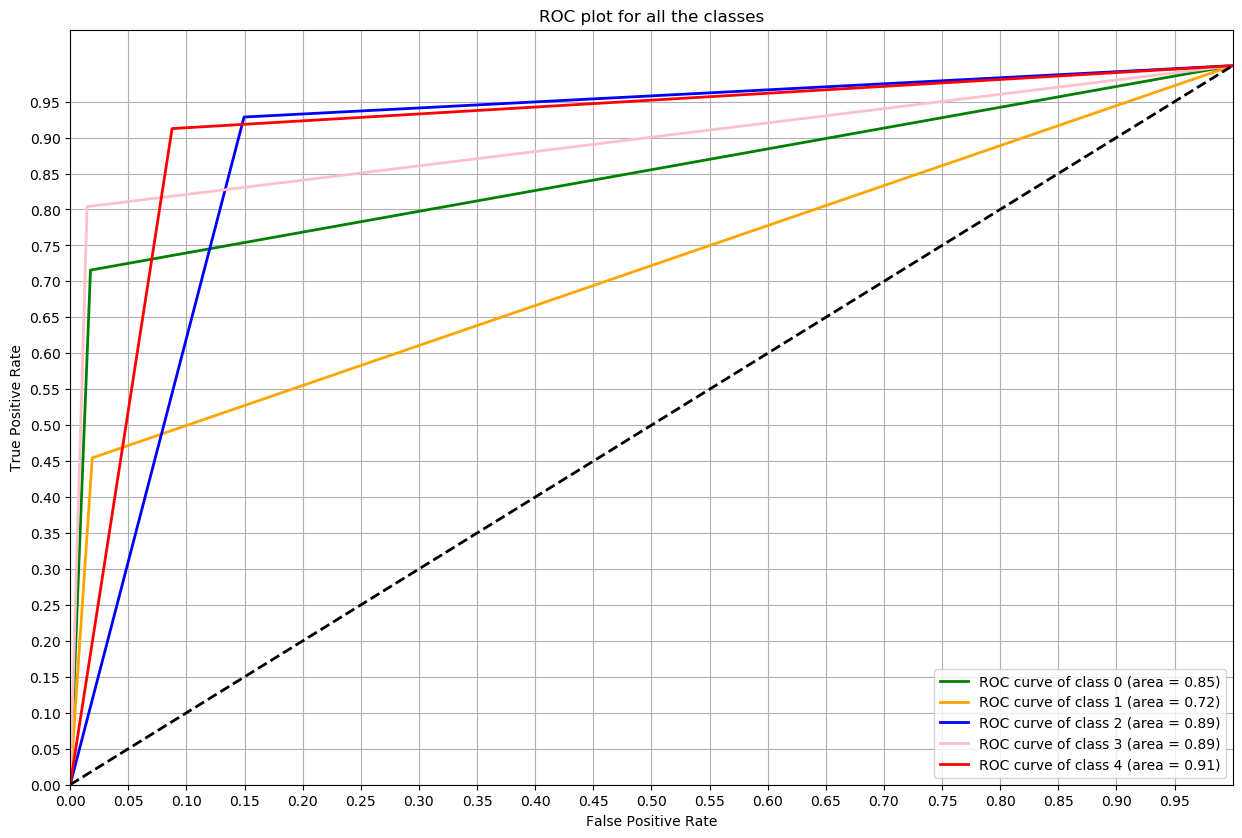

In [200]:
y_test_counts_bi = label_binarize(y_test_counts, classes=[0, 1, 2,3,4])
y_pred_bi = label_binarize(y_pred,classes=[0,1,2,3,4])
n_classes = y_test_counts_bi.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_counts_bi[:, i], y_pred_bi[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

RocPlot()

#  ROC plot για tf-idf μετασχηματισμό των counts

In [201]:
# Ακολοθούμε την ίδια διαδικασία με προηγουμένως αυτή τη φορά για την αναπαράσταση κειμένων με tf-idf μετασχηματισμό των counts
# και καλούμε και πάλι την συνάρτηση μας για να δημιουργηθεί το διάγραμμα

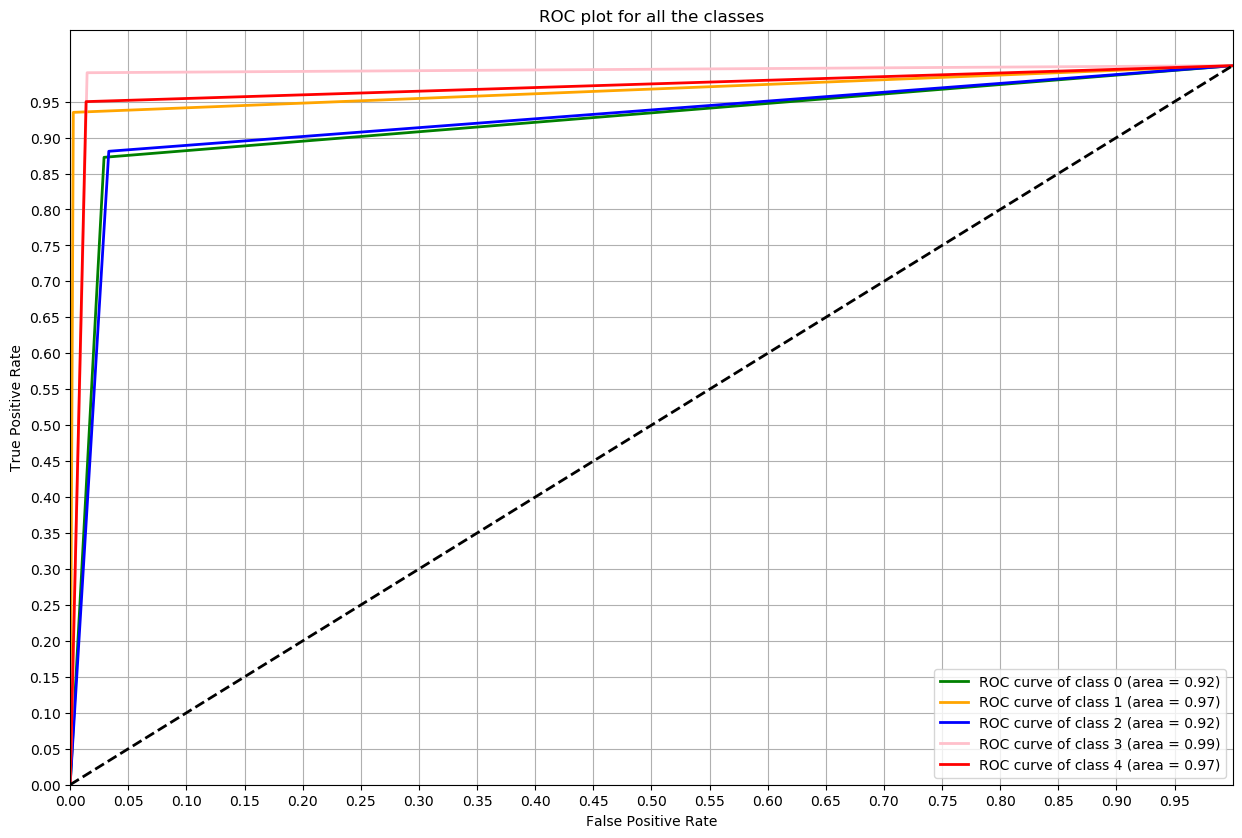

In [202]:
tfidf_y_test_counts_bi = label_binarize(tfidf_y_test_counts, classes=[0, 1, 2,3,4])
tfidf_y_pred_bi = label_binarize(tfidf_y_pred,classes=[0,1,2,3,4])
n_classes = tfidf_y_test_counts_bi.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(tfidf_y_test_counts_bi[:, i], tfidf_y_pred_bi[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

RocPlot()

In [203]:
# Παρουσιάζουμε μια σύνοψη των αποτελεσμάτων

In [204]:
print(classification_report(y_test_counts, y_pred))
print(confusion_matrix(y_test_counts, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       102
           1       0.83      0.45      0.59        77
           2       0.59      0.93      0.72        84
           3       0.94      0.80      0.87       102
           4       0.70      0.91      0.79        80

    accuracy                           0.77       445
   macro avg       0.80      0.76      0.75       445
weighted avg       0.81      0.77      0.76       445

[[73  0 19  1  9]
 [ 3 35 23  4 12]
 [ 0  1 78  0  5]
 [ 0  4 10 82  6]
 [ 3  2  2  0 73]]


# 3. Beat the Benchmark (bonus) 

In [205]:
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [206]:
# Επιλέγουμε την μ΄΄εθοδο κατηγοριοποίησης Naive Bayes χρησιμοποιώντας αυτή τη φορά το Multinomial 
# Προεπεξεργαζόμαστε τα δεδομένα με τη βοήθεια του MaxAbsScaler 
# Και υπολογίζουμε τα νέα scores για τα test.
# Συγκρίνοντας με τις τιμές που είχαμε βρει προηγουμένως οι οποίες ήταν και εκείνες πολύ υψηλές, βλέπουμε ότι 
# μετά και από την προεπεξεργασία των δεδομένων οι νέες τιμές είναι ακόμα μεγαλύτερες.

Test precision score:  0.9388509838973049
Test recall score:  0.9348314606741573
Test f1 score:  0.9334799196517413
Test Accuracy:  0.9348314606741573


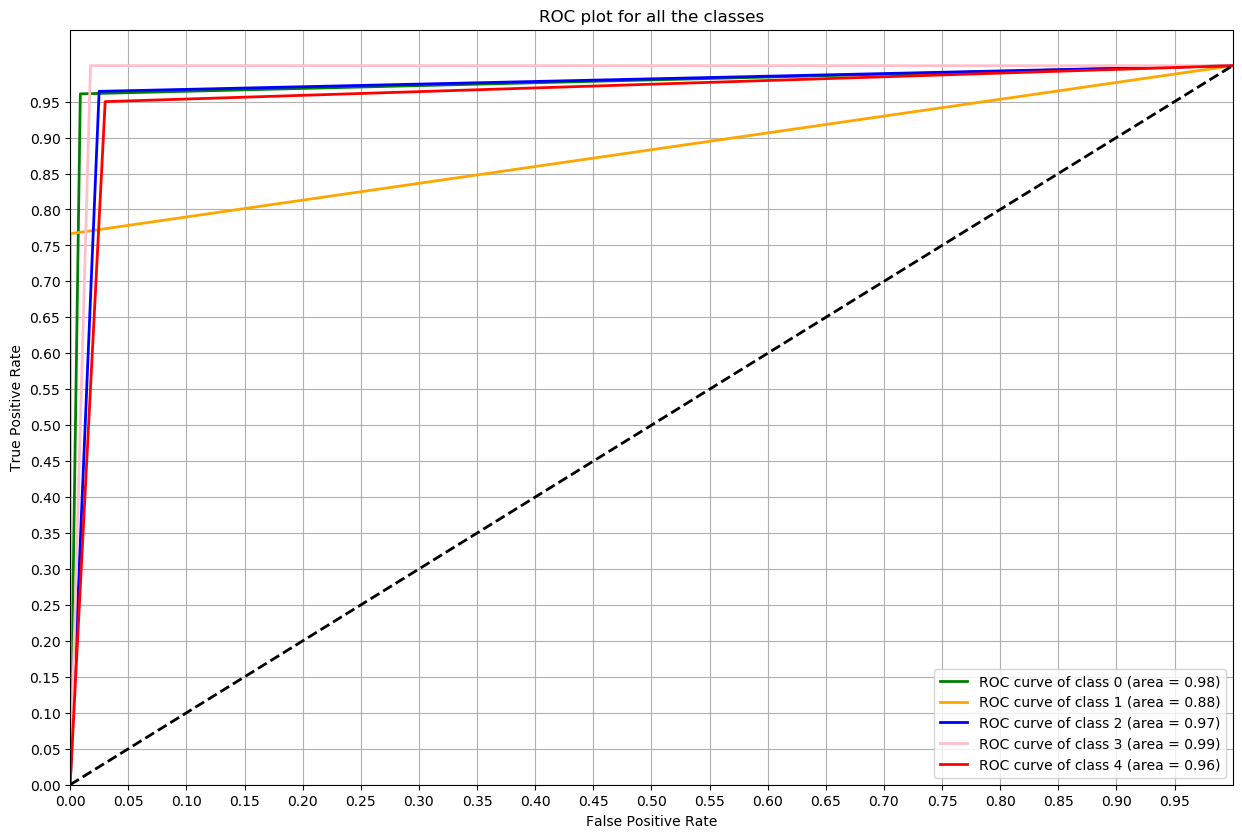

In [207]:
steps = [('scaler', preprocessing.MaxAbsScaler()), ('bayes', MultinomialNB())]
pipeline = Pipeline(steps)
simple_clf = pipeline.fit(X_train, y_train)

y_pred = cross_val_predict(simple_clf, X_test_counts, y_test_counts,cv=10)

Precision_score = precision_score(y_test_counts, y_pred, average='weighted')
print('Test precision score: ' , Precision_score)

Recall_score = recall_score(y_test_counts, y_pred, average='weighted')
print('Test recall score: ' , Recall_score)

F1_score = f1_score(y_test_counts, y_pred, average='weighted')
print('Test f1 score: ' , F1_score)

Accuracy = accuracy_score(y_test_counts, y_pred)
print("Test Accuracy: ", Accuracy)

y_test_counts_bi = label_binarize(y_test_counts, classes=[0, 1, 2,3,4])
y_pred_bi = label_binarize(y_pred,classes=[0,1,2,3,4])
n_classes = y_test_counts_bi.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_counts_bi[:, i], y_pred_bi[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

RocPlot()

# 4. Υλοποίηση Συσταδοποίησης (Clustering) 

In [208]:
#Αρχικά αποθηκεύουμε όλα τα contents των άρθρων από το αρχείο train.
#Αρχικοποιούμε ξανα τους vectorizers του ερωτήματος 2 (απλά για να είναι πιο συγκεντρωμένες και κατανοητές οι εντολές).
#Αφού κάνουμε fit και transfrom τα δεδομένα αποθηκεύουμε και τα Categories των contents που έχουμε ώστε να απεικονιστεί και
#η πραγματική κλάση (category) σε γράφημα.
#Έπειτα χρησιμοποιούμε τις μεθόδους PCA, SVD και ICA για την οπτικοποίηση. Κάθε δεύτερο γράφημα παρουσιάζει τις πραγματικές
#κλάσεις του κάθε άρθρου.

In [209]:
X_train = temp_X_train
y_train = temp_y_train

In [210]:
# Get all content
contents = []
for i in range(X_train.shape[0]):
    contents.append(X_train[i][2])

train_df = pd.DataFrame(contents, columns = ['Content'])

count_vect = CountVectorizer()
tfidf_vect = TfidfVectorizer(max_df = 1.0, min_df = 1, max_features = 1000, stop_words = 'english', ngram_range= (1,2))

data = train_df['Content'].to_numpy()

# Fit and transform
count_vect.fit(data)
tfidf_vect.fit(data)

count_contents = count_vect.transform(data).todense()
tfidf_contents = tfidf_vect.transform(data).todense()

categories = pd.DataFrame(y_train, columns = ['Category']).to_numpy()

# 4.1 Tf-idf

In [211]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Initialize km with 5 clusters
km = KMeans(n_clusters = 5, init='k-means++',n_init=10)

tfidf_contents = preprocessing.normalize(tfidf_contents)

TFpca = PCA(n_components=2).fit(tfidf_contents)
TFpca_data = TFpca.transform(tfidf_contents)

km.fit(TFpca_data)
centersTFpca = km.cluster_centers_

## 4.1 Tf-Idf PCA

In [212]:
#Δημιουργία ενός dataframe για την μέθοδο pca. Παρόμοια κινούμαστε και με τις υπόλοιπες μεθόδους.
TFpca_df = pd.DataFrame(TFpca_data, columns = ['x', 'y'])
TFpca_df['cluster'] = km.labels_
TFpca_df['Category'] = categories

TFpca_df

x         y  cluster       Category
0     0.006812 -0.214413        0       business
1     0.050902  0.044958        4       politics
2     0.083921 -0.054178        4       business
3    -0.054318  0.095530        1          sport
4     0.008159 -0.154071        0           tech
...        ...       ...      ...            ...
1775 -0.063686 -0.050716        1  entertainment
1776 -0.018343 -0.209883        0           tech
1777  0.024913 -0.165568        0       business
1778 -0.000527 -0.164519        0           tech
1779  0.055120 -0.176415        0       business

[1780 rows x 4 columns]

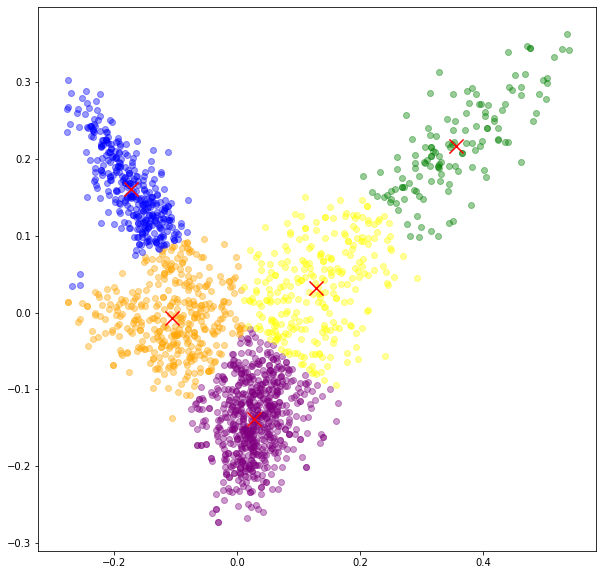

In [213]:
#Οπτικοποίηση του km clustering
df0 = TFpca_df[TFpca_df['cluster'] == 0]
df1 = TFpca_df[TFpca_df['cluster'] == 1]
df2 = TFpca_df[TFpca_df['cluster'] == 2]
df3 = TFpca_df[TFpca_df['cluster'] == 3]
df4 = TFpca_df[TFpca_df['cluster'] == 4]

plt.scatter(df0['x'], df0['y'], c = 'purple', alpha = 0.4)
plt.scatter(df1['x'], df1['y'], c = 'orange', alpha = 0.4)
plt.scatter(df2['x'], df2['y'], c = 'green', alpha = 0.4)
plt.scatter(df3['x'], df3['y'], c = 'blue', alpha = 0.4)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.4)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersTFpca[:, 0], centersTFpca[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.show()

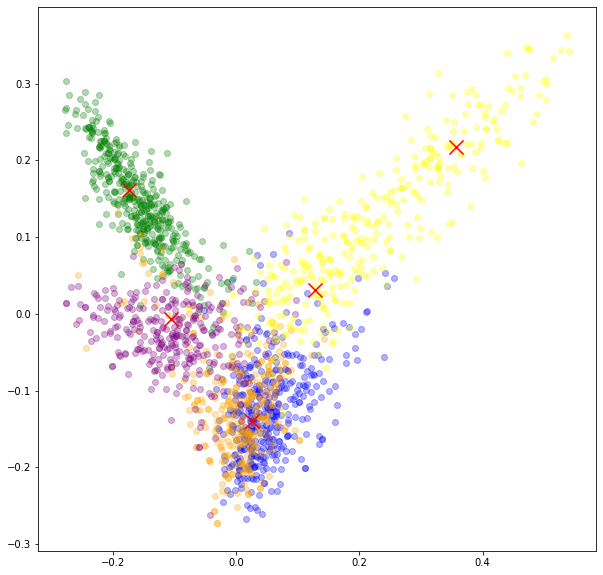

In [214]:
#Οπτικοποίηση βάση της πραγματικής κατηγορίας.
df0 = TFpca_df[TFpca_df['Category'] == 'business']
df1 = TFpca_df[TFpca_df['Category'] == 'sport']
df2 = TFpca_df[TFpca_df['Category'] == 'tech']
df3 = TFpca_df[TFpca_df['Category'] == 'entertainment']
df4 = TFpca_df[TFpca_df['Category'] == 'politics']

plt.scatter(df0['x'], df0['y'], c = 'blue', alpha = 0.3)
plt.scatter(df1['x'], df1['y'], c = 'green', alpha = 0.3)
plt.scatter(df2['x'], df2['y'], c = 'orange', alpha = 0.3)
plt.scatter(df3['x'], df3['y'], c = 'purple', alpha = 0.3)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.3)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersTFpca[:, 0], centersTFpca[:, 1], marker='x', s=200, linewidths=3, c='r')

plt.show()

## 4.1 Tf-Idf SVD

In [215]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.patches as mpatches

TFsvd = TruncatedSVD(n_components=2).fit(tfidf_contents)
TFsvd_data = TFsvd.transform(tfidf_contents)

km.fit(TFsvd_data)
centersTFsvd = km.cluster_centers_

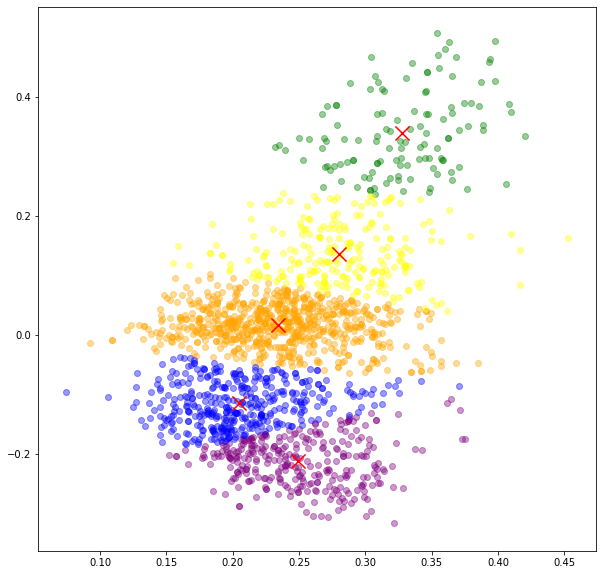

In [217]:
TFsvd_df = pd.DataFrame(TFsvd_data, columns = ['x', 'y'])
TFsvd_df['cluster'] = km.labels_
TFsvd_df['Category'] = categories

df0 = TFsvd_df[TFsvd_df['cluster'] == 0]
df1 = TFsvd_df[TFsvd_df['cluster'] == 1]
df2 = TFsvd_df[TFsvd_df['cluster'] == 2]
df3 = TFsvd_df[TFsvd_df['cluster'] == 3]
df4 = TFsvd_df[TFsvd_df['cluster'] == 4]

plt.scatter(df0['x'], df0['y'], c = 'purple', alpha = 0.4)
plt.scatter(df1['x'], df1['y'], c = 'orange', alpha = 0.4)
plt.scatter(df2['x'], df2['y'], c = 'green', alpha = 0.4)
plt.scatter(df3['x'], df3['y'], c = 'blue', alpha = 0.4)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.4)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersTFsvd[:, 0], centersTFsvd[:, 1], marker='x', s=200, linewidths=3, c='r')

plt.show()

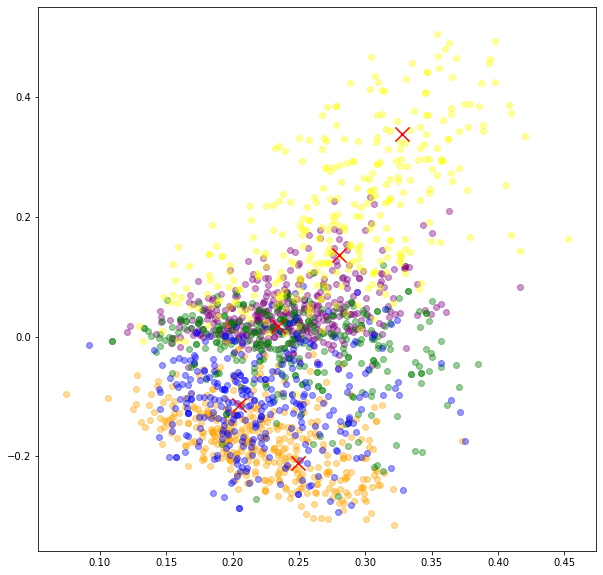

In [218]:
df0 = TFsvd_df[TFsvd_df['Category'] == 'business']
df1 = TFsvd_df[TFsvd_df['Category'] == 'sport']
df2 = TFsvd_df[TFsvd_df['Category'] == 'tech']
df3 = TFsvd_df[TFsvd_df['Category'] == 'entertainment']
df4 = TFsvd_df[TFsvd_df['Category'] == 'politics']


plt.scatter(df0['x'], df0['y'], c = 'purple', alpha = 0.4)
plt.scatter(df1['x'], df1['y'], c = 'orange', alpha = 0.4)
plt.scatter(df2['x'], df2['y'], c = 'green', alpha = 0.4)
plt.scatter(df3['x'], df3['y'], c = 'blue', alpha = 0.4)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.4)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersTFsvd[:, 0], centersTFsvd[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.show()

## 4.1 Tf-Idf ICA

In [219]:
from sklearn.decomposition import FastICA

TFica = FastICA(n_components=2).fit(tfidf_contents)
TFica_data = TFica.transform(tfidf_contents)

km.fit(TFica_data)
centersTFica = km.cluster_centers_

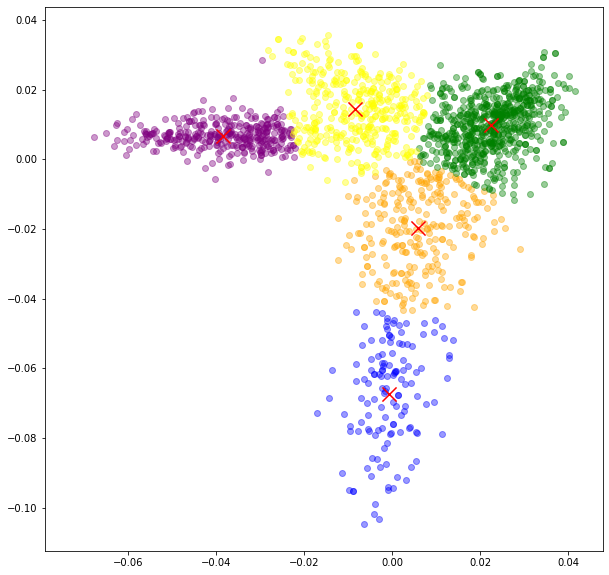

In [220]:
TFica_df = pd.DataFrame(TFica_data, columns = ['x', 'y'])
TFica_df['cluster'] = km.labels_
TFica_df['Category'] = categories

df0 = TFica_df[TFica_df['cluster'] == 0]
df1 = TFica_df[TFica_df['cluster'] == 1]
df2 = TFica_df[TFica_df['cluster'] == 2]
df3 = TFica_df[TFica_df['cluster'] == 3]
df4 = TFica_df[TFica_df['cluster'] == 4]

plt.scatter(df0['x'], df0['y'], c = 'purple', alpha = 0.4)
plt.scatter(df1['x'], df1['y'], c = 'orange', alpha = 0.4)
plt.scatter(df2['x'], df2['y'], c = 'green', alpha = 0.4)
plt.scatter(df3['x'], df3['y'], c = 'blue', alpha = 0.4)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.4)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersTFica[:, 0], centersTFica[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.show()

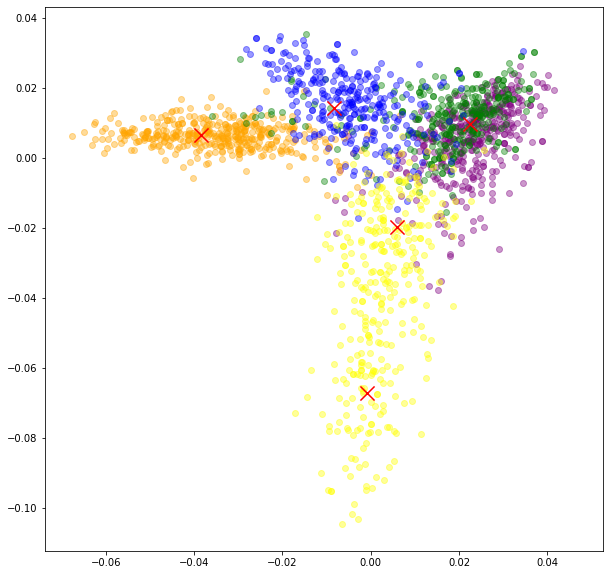

In [221]:
df0 = TFica_df[TFica_df['Category'] == 'business']
df1 = TFica_df[TFica_df['Category'] == 'sport']
df2 = TFica_df[TFica_df['Category'] == 'tech']
df3 = TFica_df[TFica_df['Category'] == 'entertainment']
df4 = TFica_df[TFica_df['Category'] == 'politics']

plt.scatter(df0['x'], df0['y'], c = 'purple', alpha = 0.4)
plt.scatter(df1['x'], df1['y'], c = 'orange', alpha = 0.4)
plt.scatter(df2['x'], df2['y'], c = 'green', alpha = 0.4)
plt.scatter(df3['x'], df3['y'], c = 'blue', alpha = 0.4)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.4)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersTFica[:, 0], centersTFica[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.show()

# 4.1 Counts

## 4.1 Counts PCA

In [222]:
count_contents = preprocessing.normalize(count_contents)

COpca = PCA(n_components=2).fit(count_contents)
dataCOpca = COpca.transform(count_contents)

km.fit(dataCOpca)
centersCOpca = km.cluster_centers_

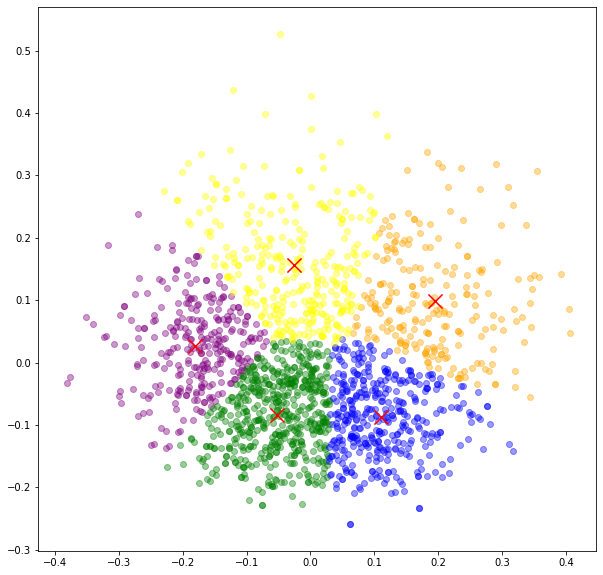

In [223]:
COpca_df = pd.DataFrame(dataCOpca, columns = ['x', 'y'])
COpca_df['cluster'] = km.labels_
COpca_df['Category'] = categories

df0 = COpca_df[COpca_df['cluster'] == 0]
df1 = COpca_df[COpca_df['cluster'] == 1]
df2 = COpca_df[COpca_df['cluster'] == 2]
df3 = COpca_df[COpca_df['cluster'] == 3]
df4 = COpca_df[COpca_df['cluster'] == 4]

plt.scatter(df0['x'], df0['y'], c = 'purple', alpha = 0.4)
plt.scatter(df1['x'], df1['y'], c = 'orange', alpha = 0.4)
plt.scatter(df2['x'], df2['y'], c = 'green', alpha = 0.4)
plt.scatter(df3['x'], df3['y'], c = 'blue', alpha = 0.4)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.4)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersCOpca[:, 0], centersCOpca[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.show()

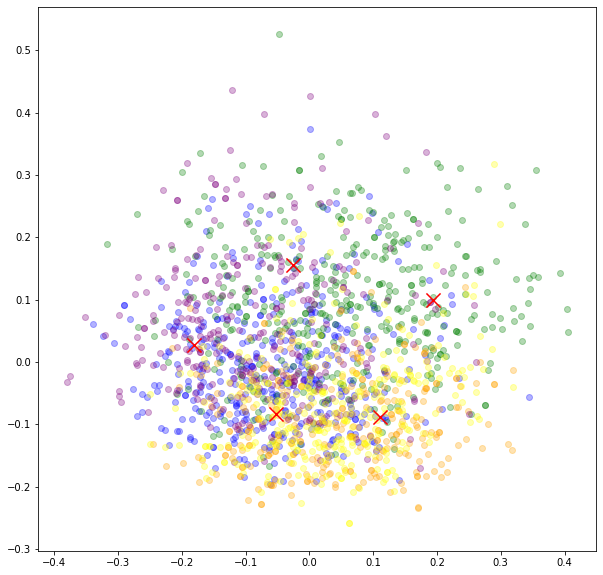

In [224]:
df0 = COpca_df[COpca_df['Category'] == 'business']
df1 = COpca_df[COpca_df['Category'] == 'sport']
df2 = COpca_df[COpca_df['Category'] == 'tech']
df3 = COpca_df[COpca_df['Category'] == 'entertainment']
df4 = COpca_df[COpca_df['Category'] == 'politics']

plt.scatter(df0['x'], df0['y'], c = 'blue', alpha = 0.3)
plt.scatter(df1['x'], df1['y'], c = 'green', alpha = 0.3)
plt.scatter(df2['x'], df2['y'], c = 'orange', alpha = 0.3)
plt.scatter(df3['x'], df3['y'], c = 'purple', alpha = 0.3)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.3)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersCOpca[:, 0], centersCOpca[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.show()

## 4.1 Counts SVD

In [225]:
COsvd = TruncatedSVD(n_components=2).fit(count_contents)
dataCOsvd = COsvd.transform(count_contents)

km.fit(dataCOsvd)
centersCOsvd = km.cluster_centers_

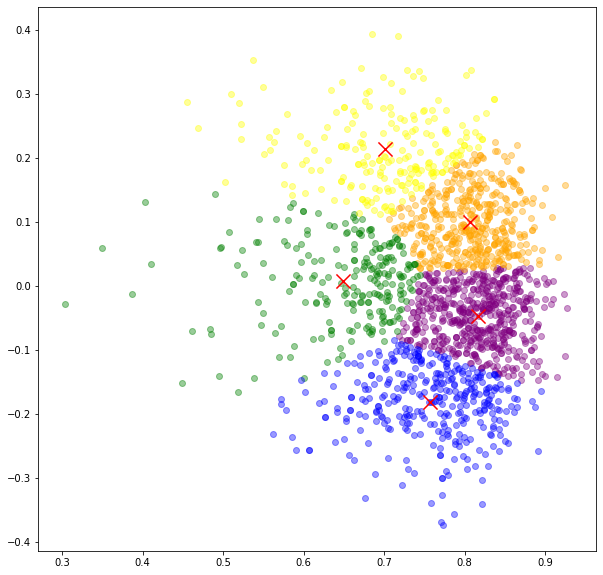

In [226]:
COsvd_df = pd.DataFrame(dataCOsvd, columns = ['x', 'y'])
COsvd_df['cluster'] = km.labels_
COsvd_df['Category'] = categories

df0 = COsvd_df[COsvd_df['cluster'] == 0]
df1 = COsvd_df[COsvd_df['cluster'] == 1]
df2 = COsvd_df[COsvd_df['cluster'] == 2]
df3 = COsvd_df[COsvd_df['cluster'] == 3]
df4 = COsvd_df[COsvd_df['cluster'] == 4]


plt.scatter(df0['x'], df0['y'], c = 'purple', alpha = 0.4)
plt.scatter(df1['x'], df1['y'], c = 'orange', alpha = 0.4)
plt.scatter(df2['x'], df2['y'], c = 'green', alpha = 0.4)
plt.scatter(df3['x'], df3['y'], c = 'blue', alpha = 0.4)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.4)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersCOsvd[:, 0], centersCOsvd[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.show()

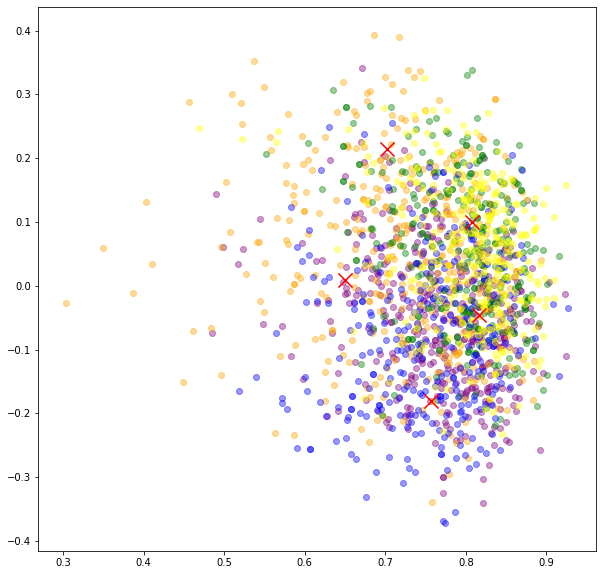

In [227]:
df0 = COsvd_df[COsvd_df['Category'] == 'business']
df1 = COsvd_df[COsvd_df['Category'] == 'sport']
df2 = COsvd_df[COsvd_df['Category'] == 'tech']
df3 = COsvd_df[COsvd_df['Category'] == 'entertainment']
df4 = COsvd_df[COsvd_df['Category'] == 'politics']


plt.scatter(df0['x'], df0['y'], c = 'purple', alpha = 0.4)
plt.scatter(df1['x'], df1['y'], c = 'orange', alpha = 0.4)
plt.scatter(df2['x'], df2['y'], c = 'green', alpha = 0.4)
plt.scatter(df3['x'], df3['y'], c = 'blue', alpha = 0.4)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.4)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersCOsvd[:, 0], centersCOsvd[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.show()

## 4.1 Counts ICA

In [228]:
COica = FastICA(n_components=2).fit(count_contents)
dataCOica = COica.transform(count_contents)

km.fit(dataCOica)
centersCOica = km.cluster_centers_

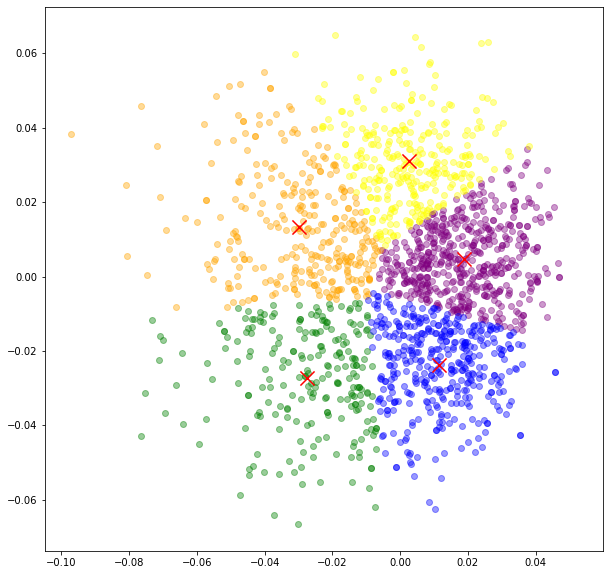

In [229]:
COica_df = pd.DataFrame(dataCOica, columns = ['x', 'y'])
COica_df['cluster'] = km.labels_
COica_df['Category'] = categories

df0 = COica_df[COica_df['cluster'] == 0]
df1 = COica_df[COica_df['cluster'] == 1]
df2 = COica_df[COica_df['cluster'] == 2]
df3 = COica_df[COica_df['cluster'] == 3]
df4 = COica_df[COica_df['cluster'] == 4]


plt.scatter(df0['x'], df0['y'], c = 'purple', alpha = 0.4)
plt.scatter(df1['x'], df1['y'], c = 'orange', alpha = 0.4)
plt.scatter(df2['x'], df2['y'], c = 'green', alpha = 0.4)
plt.scatter(df3['x'], df3['y'], c = 'blue', alpha = 0.4)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.4)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersCOica[:, 0], centersCOica[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.show()

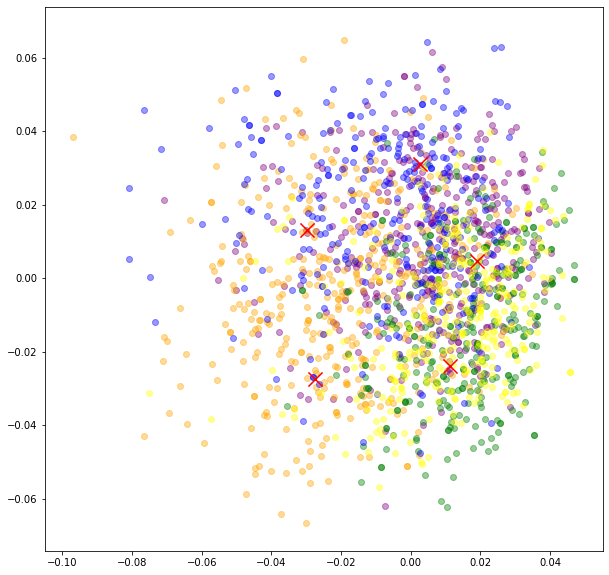

In [230]:
df0 = COica_df[COica_df['Category'] == 'business']
df1 = COica_df[COica_df['Category'] == 'sport']
df2 = COica_df[COica_df['Category'] == 'tech']
df3 = COica_df[COica_df['Category'] == 'entertainment']
df4 = COica_df[COica_df['Category'] == 'politics']

plt.scatter(df0['x'], df0['y'], c = 'purple', alpha = 0.4)
plt.scatter(df1['x'], df1['y'], c = 'orange', alpha = 0.4)
plt.scatter(df2['x'], df2['y'], c = 'green', alpha = 0.4)
plt.scatter(df3['x'], df3['y'], c = 'blue', alpha = 0.4)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.4)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersCOica[:, 0], centersCOica[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.show()

# 4.2 Word2Vec

In [231]:
#Αποθηκεύουμε όλες τις λέξεις του κάθε content ώστε να γίνει το vectorize με το Word2Vec.
#Έπειτα χρησιμοποιούμε τον Word2Vec και για να προσδιορίσουμε το σημείο ενός content παίρνουμε τον μέσο όρο των αποτελεσμάτων
#των λέξεων αυτού του content που βγήκαν από τον Word2Vec
#Τέλος χρησιμοποιούμε με παρόμοιο τρόπο τις μεθόδους PCA, SVD και ICA για την οπτικοποίηση των δεδομένων.
#Όπως και προηγουμένως κάθε δεύτερο γράφημα απεικονίζει την πραγματική κλάση κάθε content.

In [232]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# datalist is going to be a list of lists of each content's words
datalist = []

for i in list(data):
    tmp1 = []
    tmp2 = []

    tmp1 += word_tokenize(i)
    for j in tmp1:
        # Dont consider small words or stop words
        if len(j) <= 3 or j in total_sw:
            continue
        else:
            tmp2.append(j)
        
    datalist.append(tmp2)
        
len(datalist)

1780

In [233]:
# Word2Vec every word and compute the average for every content
veclist = []
for i in datalist:
    model = Word2Vec([i], min_count=2)
    SUM = 0
    LEN = 0
    for word in model.wv.vocab:
            SUM += model[word]
            LEN += 1
    veclist.append(SUM/LEN)
len(veclist)

C:\Users\chrysa\Documents\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


1780

## 4.2 Word2Vec PCA

In [234]:
W2Vpca = PCA(n_components=2).fit(veclist)
dataW2Vpca = W2Vpca.transform(veclist)

In [235]:
km.fit(dataW2Vpca)
centersW2Vpca = km.cluster_centers_

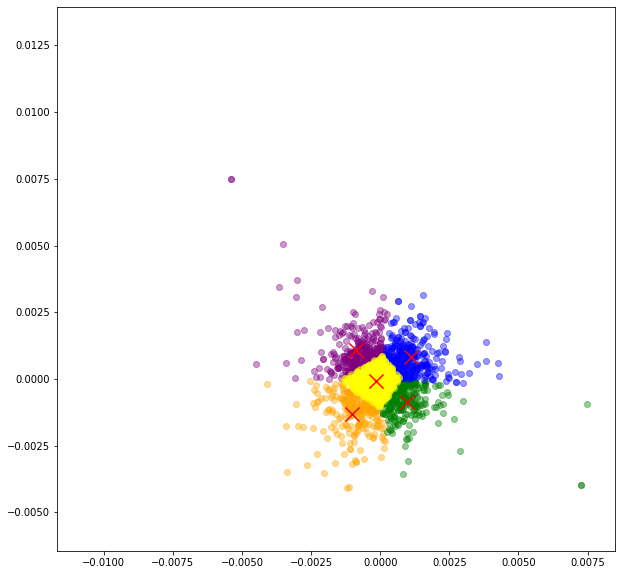

In [236]:
W2Vpca_df = pd.DataFrame(dataW2Vpca, columns = ['x', 'y'])
W2Vpca_df['cluster'] = km.labels_
W2Vpca_df['category'] = categories

df0 = W2Vpca_df[W2Vpca_df['cluster'] == 0]
df1 = W2Vpca_df[W2Vpca_df['cluster'] == 1]
df2 = W2Vpca_df[W2Vpca_df['cluster'] == 2]
df3 = W2Vpca_df[W2Vpca_df['cluster'] == 3]
df4 = W2Vpca_df[W2Vpca_df['cluster'] == 4]

plt.scatter(df0['x'], df0['y'], c = 'purple', alpha = 0.4)
plt.scatter(df1['x'], df1['y'], c = 'orange', alpha = 0.4)
plt.scatter(df2['x'], df2['y'], c = 'green', alpha = 0.4)
plt.scatter(df3['x'], df3['y'], c = 'blue', alpha = 0.4)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.4)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersW2Vpca[:, 0], centersW2Vpca[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.show()

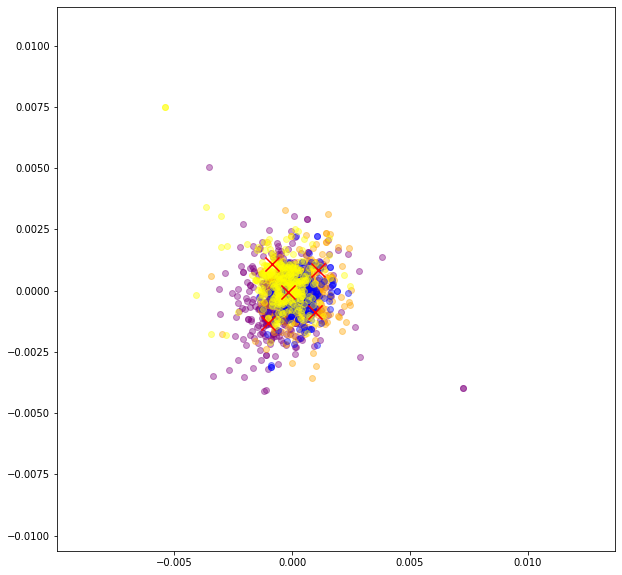

In [237]:
df0 = W2Vpca_df[W2Vpca_df['category'] == 'sport']
df1 = W2Vpca_df[W2Vpca_df['category'] == 'entertainment']
df2 = W2Vpca_df[W2Vpca_df['category'] == 'bussiness']
df3 = W2Vpca_df[W2Vpca_df['category'] == 'tech']
df4 = W2Vpca_df[W2Vpca_df['category'] == 'politics']

plt.scatter(df0['x'], df0['y'], c = 'purple', alpha = 0.4)
plt.scatter(df1['x'], df1['y'], c = 'orange', alpha = 0.4)
plt.scatter(df2['x'], df2['y'], c = 'green', alpha = 0.4)
plt.scatter(df3['x'], df3['y'], c = 'blue', alpha = 0.4)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.4)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersW2Vpca[:, 0], centersW2Vpca[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.show()

## 4.2 Word2Vec SVD


In [238]:
W2Vsvd = TruncatedSVD(n_components=2).fit(veclist)
dataW2Vsvd = W2Vsvd.transform(veclist)

In [239]:
km.fit(dataW2Vsvd)
centersW2Vsvd = km.cluster_centers_

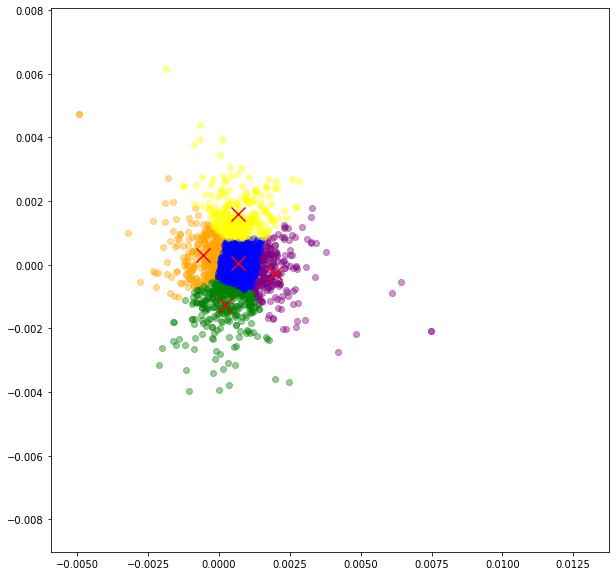

In [240]:
W2Vsvd_df = pd.DataFrame(dataW2Vsvd, columns = ['x', 'y'])
W2Vsvd_df['cluster'] = km.labels_
W2Vsvd_df['category'] = categories

df0 = W2Vsvd_df[W2Vsvd_df['cluster'] == 0]
df1 = W2Vsvd_df[W2Vsvd_df['cluster'] == 1]
df2 = W2Vsvd_df[W2Vsvd_df['cluster'] == 2]
df3 = W2Vsvd_df[W2Vsvd_df['cluster'] == 3]
df4 = W2Vsvd_df[W2Vsvd_df['cluster'] == 4]

plt.scatter(df0['x'], df0['y'], c = 'purple', alpha = 0.4)
plt.scatter(df1['x'], df1['y'], c = 'orange', alpha = 0.4)
plt.scatter(df2['x'], df2['y'], c = 'green', alpha = 0.4)
plt.scatter(df3['x'], df3['y'], c = 'blue', alpha = 0.4)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.4)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersW2Vsvd[:, 0], centersW2Vsvd[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.show()

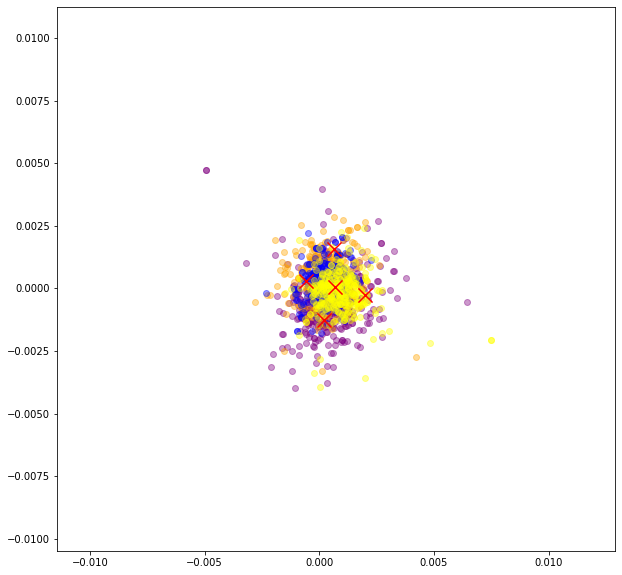

In [241]:
df0 = W2Vsvd_df[W2Vsvd_df['category'] == 'sport']
df1 = W2Vsvd_df[W2Vsvd_df['category'] == 'entertainment']
df2 = W2Vsvd_df[W2Vsvd_df['category'] == 'bussiness']
df3 = W2Vsvd_df[W2Vsvd_df['category'] == 'tech']
df4 = W2Vsvd_df[W2Vsvd_df['category'] == 'politics']

plt.scatter(df0['x'], df0['y'], c = 'purple', alpha = 0.4)
plt.scatter(df1['x'], df1['y'], c = 'orange', alpha = 0.4)
plt.scatter(df2['x'], df2['y'], c = 'green', alpha = 0.4)
plt.scatter(df3['x'], df3['y'], c = 'blue', alpha = 0.4)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.4)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersW2Vsvd[:, 0], centersW2Vsvd[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.show()

## 4.2 Word2Vec ICA

In [242]:
W2Vica = FastICA(n_components=2).fit(veclist)
dataW2Vica = W2Vica.transform(veclist)

print(len(dataW2Vica))

1780


In [243]:
km.fit(dataW2Vica)
centersW2Vica = km.cluster_centers_

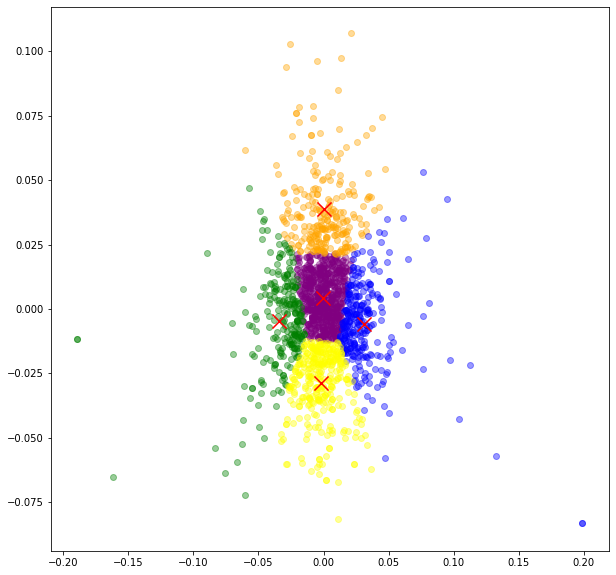

In [244]:
W2Vica_df = pd.DataFrame(dataW2Vica, columns = ['x', 'y'])
W2Vica_df['cluster'] = km.labels_
W2Vica_df['category'] = categories

df0 = W2Vica_df[W2Vica_df['cluster'] == 0]
df1 = W2Vica_df[W2Vica_df['cluster'] == 1]
df2 = W2Vica_df[W2Vica_df['cluster'] == 2]
df3 = W2Vica_df[W2Vica_df['cluster'] == 3]
df4 = W2Vica_df[W2Vica_df['cluster'] == 4]

plt.scatter(df0['x'], df0['y'], c = 'purple', alpha = 0.4)
plt.scatter(df1['x'], df1['y'], c = 'orange', alpha = 0.4)
plt.scatter(df2['x'], df2['y'], c = 'green', alpha = 0.4)
plt.scatter(df3['x'], df3['y'], c = 'blue', alpha = 0.4)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.4)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersW2Vica[:, 0], centersW2Vica[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.show()

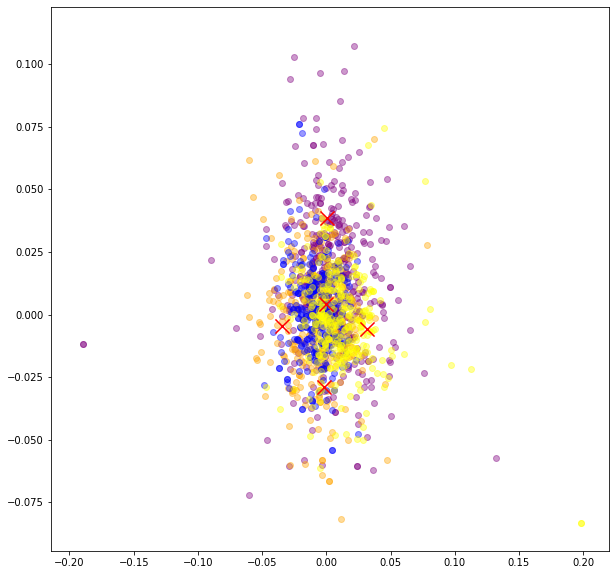

In [245]:
df0 = W2Vica_df[W2Vica_df['category'] == 'sport']
df1 = W2Vica_df[W2Vica_df['category'] == 'entertainment']
df2 = W2Vica_df[W2Vica_df['category'] == 'bussiness']
df3 = W2Vica_df[W2Vica_df['category'] == 'tech']
df4 = W2Vica_df[W2Vica_df['category'] == 'politics']

plt.scatter(df0['x'], df0['y'], c = 'purple', alpha = 0.4)
plt.scatter(df1['x'], df1['y'], c = 'orange', alpha = 0.4)
plt.scatter(df2['x'], df2['y'], c = 'green', alpha = 0.4)
plt.scatter(df3['x'], df3['y'], c = 'blue', alpha = 0.4)
plt.scatter(df4['x'], df4['y'], c = 'yellow', alpha = 0.4)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(centersW2Vica[:, 0], centersW2Vica[:, 1], marker='x', s=200, linewidths=3, c='r')
plt.show()